# Install package

In [1]:
# library(devtools)

#devtools::install_github("SoloveyMaria/commAlgPackage_v3"
#                         ,ref="main"
#                         ,auth_token = "your_token"
#)

# Calculate communication

In [2]:
# libraries
library(CommPackage)
library(ggplot2)
library(gridExtra)
library(grid)
library(ComplexHeatmap)
library(dendsort)
library(igraph)
require(circlize)
library(R.utils)
library(data.table) #to read gz file
# library(tidyverse)

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: circlize

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github pa

In [3]:
# paths
path_in <- getwd()

print("path_in")
print(path_in)

[1] "path_in"
[1] "/work/project/ladcol_011/MariaWF/community-paper/preprocessing"


In [4]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/mcelik/miniconda3/envs/tf/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] data.table_1.14.6       R.utils_2.12.2          R.oo_1.25.0            
 [4] R.methodsS3_1.8.2       circlize_0.4.15         igraph_1.3.5           
 [7] dendsort_0.3.4          ComplexHeatmap_2.14.0   gridExtra_2.3          
[10] ggplot2_3.4.0           CommPackage_3.14.0.9000

loaded

## Load data

To calculate interactions, we will need the following files: normalized and batch corrected `counts`, cell annotation file `anno_cells`, and a sample annotation file `anno_samples`.

The `counts` file contains normalized and batch corrected counts with genes in the rows and cell IDs in the columns.

The `anno_cells` file should contain columns named cell_ID, cell_type and sample_ID.

The `anno_sample` file should countan columns named sample_ID health_status (e.g. "healthy" or "AML") and case_or_conrol (e.g. "control" or "case").

In [5]:
# # load counts
# print("load counts")
# counts <- read.table(gzfile(paste0(path_in,"/counts_corr.csv.gz")
#                             )
#                      ,sep = ","
#                      ,row.names = 1
#                      ,header = TRUE
#                      )
# # load counts

counts <- fread("counts_corr.csv.gz", header = TRUE)
counts <- as.data.frame(counts)
rownames(counts) <- counts$gene_symbol
counts <- counts[,-1]
# head(str(counts))
print(str(counts))

'data.frame':	12485 obs. of  74583 variables:
 $ AML1012-D0_AAAAAGTTACGT: num  0.03236 0.00341 0.0019 -0.00154 0.00565 ...
 $ AML1012-D0_AAAACACCAATC: num  0.0632 0.00367 0.00606 0.00265 0.02014 ...
 $ AML1012-D0_AAAATAGCCTTT: num  0.01192 0.00545 0.0072 -0.00149 0.01288 ...
 $ AML1012-D0_AAACATTAAACG: num  0.14074 0.01313 0.00681 -0.00167 0.01139 ...
 $ AML1012-D0_AAACCACGTGCN: num  0.08601 0.001354 -0.000301 0.004807 0.008856 ...
 $ AML1012-D0_AAACGCTGGAAN: num  0.07267 0.00209 0.00378 0.00264 0.01749 ...
 $ AML1012-D0_AAACTGGTACTA: num  0.04825 0.00698 0.00129 0.00441 0.00424 ...
 $ AML1012-D0_AAACTTGCCCGT: num  0.10351 0.00211 0.00481 0.00484 0.02307 ...
 $ AML1012-D0_AAATGAAAGTCC: num  0.04366 0.00309 0.00707 0.00484 0.01954 ...
 $ AML1012-D0_AAATGTACGGTA: num  0.0386 0.00311 0.00279 0.00813 0.01409 ...
 $ AML1012-D0_AACAATGGTGTG: num  0.0826 0.00185 0.00968 0.00311 0.01459 ...
 $ AML1012-D0_AACATTTAACAT: num  0.05401 0.00276 0.00549 0.00416 0.0135 ...
 $ AML1012-D0_AACCCCATGCAG: 

In [6]:
# load cell annotation
print("load cell annotation")
anno_cells <- read.table(paste0(path_in,"/anno_cells_corr.txt")
                         ,sep = "\t"
                         ,row.names = 1
                         ,header = TRUE
                         )
print(str(anno_cells))

[1] "load cell annotation"
'data.frame':	74583 obs. of  37 variables:
 $ cell_ID.1                     : chr  "AML1012-D0_AAAAAGTTACGT" "AML1012-D0_AAAACACCAATC" "AML1012-D0_AAAATAGCCTTT" "AML1012-D0_AAACATTAAACG" ...
 $ cell_type_original            : chr  "GMP" "GMP-like" "Prog-like" "ProMono-like" ...
 $ sample_ID                     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
 $ malignant                     : chr  "False" "True" "True" "True" ...
 $ patient_ID                    : chr  "AML1012" "AML1012" "AML1012" "AML1012" ...
 $ dataset                       : chr  "GSE116256" "GSE116256" "GSE116256" "GSE116256" ...
 $ gender                        : chr  "F" "F" "F" "F" ...
 $ age                           : int  32 32 32 32 32 32 32 32 32 32 ...
 $ health_status                 : chr  "AML" "AML" "AML" "AML" ...
 $ case_or_control               : chr  "case" "case" "case" "case" ...
 $ day                           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cell_typ

In [7]:
# load sample annotation
print("load sample annotation")
anno_samples <- read.table(paste0(path_in,"/anno_samples_corr.txt")
                           ,sep = "\t"
                           ,row.names = 1
                           ,header = TRUE
                           )
print(str(anno_samples))

[1] "load sample annotation"
'data.frame':	33 obs. of  15 variables:
 $ sample_ID                    : chr  "AML1012-D0" "AML210A-D0" "AML328-D0" "AML419A-D0" ...
 $ patient_ID                   : chr  "AML1012" "AML210A" "AML328" "AML419A" ...
 $ dataset                      : chr  "GSE116256" "GSE116256" "GSE116256" "GSE116256" ...
 $ gender                       : chr  "F" "M" "F" "F" ...
 $ age                          : int  32 67 74 54 58 70 26 57 42 52 ...
 $ health_status                : chr  "AML" "AML" "AML" "AML" ...
 $ case_or_control              : chr  "case" "case" "case" "case" ...
 $ day                          : num  0 0 0 0 0 0 0 0 0 NA ...
 $ nr_cells_raw                 : int  1136 748 1094 1189 485 2328 1586 933 3813 108 ...
 $ nr_cells_cf                  : int  951 640 965 1091 399 2196 1410 869 3574 93 ...
 $ nr_cells_cf_ctf              : int  946 603 909 1086 388 2186 1407 868 3504 93 ...
 $ total_counts_raw_cf_ctf_gf   : int  2060373 1530216 2367765 278338

The ligand-receptor pair database is provided by the algorithm, but the user can also use a custom database. In this case, the custom database should have the columns named Ligand.ApprovedSymbol, Receptor.ApprovedSymbol and pair. DOUBLE CHECK FOR THE NEW DB!!!!!!

In [8]:
# load Ligand-Receptor database
load(paste0(path_in
            ,"/additional_input_files"
            ,"/LR_database.rda"))
print(str(LR_database))

'data.frame':	2649 obs. of  6 variables:
 $ Pair.Name              : chr  "A2M_LRP1" "AANAT_MTNR1A" "AANAT_MTNR1B" "ACE_AGTR2" ...
 $ Ligand.ApprovedSymbol  : chr  "A2M" "AANAT" "AANAT" "ACE" ...
 $ Ligand.Name            : chr  "alpha-2-macroglobulin" "aralkylamine N-acetyltransferase" "aralkylamine N-acetyltransferase" "angiotensin I converting enzyme" ...
 $ Receptor.ApprovedSymbol: chr  "LRP1" "MTNR1A" "MTNR1B" "AGTR2" ...
 $ Receptor.Name          : chr  "low density lipoprotein receptor-related protein 1" "melatonin receptor 1A" "melatonin receptor 1B" "angiotensin II receptor, type 2" ...
 $ Classification         : chr  "other" "other" "other" "other" ...
NULL


## Threhsolds

When calculation the interactions, it is possible to set three threshold: 
- `threshold_celltype_size` is a threshold for the minimum number of cells that a cell type should contain (in one sample). If the number of cells in the cell type of interest in a particular sample is less or equal to the `threshold_celltype_size`, then we consider this cell type as missing in this sample. This threshold affects the relative cell type abundance parameter (rho). The deafult value for the `threshold_celltype_size` is 4. 
- `threshold_nr_active_cells` is a threshold for the minimum number of active cells in a cell type (in the sample of interest). A cell is concidered as active (for a specific gene), if it is expressing this gene above the `threshold_expr`. If the number of active cells (for a specific gene) in a cell type is smaller or equal to the `threshold_nr_active_cells`, i.e. does not pass the threshold, then it is set to zero (in this sample). This threshold affects the relative active fraction (phi) parameter. The deafult value for the `threshold_expr` is zero.
- `threshold_expr` is a threshold for an expression value of a gene in a cell. If an expression value af a gene in a cell is smaller or equal to the `threshold_expr` value, it will be set to zero. This threshold affects the relative active fration (phi) and the relative mean expression (p) paramteres. The deafult value for the `threshold_expr` is zero. In our analysis, we will though set it arbtrarily to 0.05.

In [9]:
# set threshold of the cell type size
threshold_celltype_size <- 4
print("threshold_celltype_size >")
print(threshold_celltype_size)

[1] "threshold_celltype_size >"
[1] 4


In [10]:
# set threshold of the minimum number of active cells
threshold_nr_active_cells <- 0
print("threshold_nr_active_cells >")
print(threshold_nr_active_cells)

[1] "threshold_nr_active_cells >"
[1] 0


In [11]:
# set threshold of expression
threshold_expr <- 0.05
print("threshold_expr >")
print(threshold_expr)

[1] "threshold_expr >"
[1] 0.05


## Calculate interactions

In [12]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.1      
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ dplyr::between()       masks data.table::between()
✖ dplyr::combine()       masks gridExtra::combine()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ tidyr::extract()       masks R.utils::extract()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::first()         masks data.table::first()
✖ dplyr::groups()       

In [13]:
# [Muhammet]
anno_cells <- anno_cells %>% 
  rename(
    cell_ID = cell_ID.1,
    )

In [14]:
print("calculat communication")
start_time <- Sys.time()
interactions = calculate_communication(counts = counts
                                       ,anno_samples = anno_samples
                                       ,anno_cells = anno_cells
                                       ,verbose = TRUE#FALSE#
                                       ,threshold_celltype_size = threshold_celltype_size
                                       ,threshold_nr_active_cells = threshold_nr_active_cells
                                       ,threshold_expr = threshold_expr
                                       ,lrp_database = LR_database
                                       )

end_time <- Sys.time()
end_time - start_time

print(str(interactions))


[1] "calculat communication"
[1] "cleaning lrp database"
[1] "filtering out ligands and receptor which are not present in the count matrix"
[1] "create initial anno_interactions"
[1] "calculate fraction of each cell type in each sample"
[1] "calculate maximum (over all samples) fraction for each cell type"
[1] "calculate active fraction for each gene in each cell type"
[1] "calculate max active fraction for ligand in sending cell type"
[1] "calculate max active fraction for receptor in receiving cell type"
[1] "calculate mean expression in the active fraction"


Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample AML1012-D0 does not contain cell type B -- interactions for this cell type in this sample will get zero values.”
Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample AML419A-D0 does not contain cell type T -- interactions for this cell type in this sample will get zero values.”
Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample AML420B-D0 does not contain cell type DC -- interactions for this cell type in this sample will get zero values.”
Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample AML916-D0 does not contain cell type Mono -- interactions for this cell type in this sample will get zero values.”
Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample AML921A-D0 does not conta

[1] "calculate max mean expression for ligand in sending cell type"
[1] "calculate max mean expression for receptor in receiving cell type"
[1] "for sample AML1012-D0 :"
[1] "calculate interactions weights"
[1] "calculate rho (relative abundance) for each cell type"
[1] "calculate rho (relative abundance) for each cell type"
[1] "calculate rho"
[1] "calculate phi (relative active fraction) for each cell type"
[1] "calculate phi (relative active fraction) for each cell type"
[1] "calculate phi"
[1] "calculate p_cellType_gene"
[1] "calculate p_cellType_gene"
[1] "calculate interactions weights"
[1] "for sample AML210A-D0 :"
[1] "calculate interactions weights"
[1] "calculate rho (relative abundance) for each cell type"
[1] "calculate rho (relative abundance) for each cell type"
[1] "calculate rho"
[1] "calculate phi (relative active fraction) for each cell type"
[1] "calculate phi (relative active fraction) for each cell type"
[1] "calculate phi"
[1] "calculate p_cellType_gene"
[1] "calc

Time difference of 2.01865 mins

List of 23
 $ per_sample_anno_interactions:List of 33
  ..$ AML1012-D0:'data.frame':	24408 obs. of  29 variables:
  .. ..$ interaction_ID     : chr [1:24408] "HSPC:ADAM10_HSPC:AXL" "HSPC:ADAM15_HSPC:ITGA5" "HSPC:ADAM15_HSPC:ITGA9" "HSPC:ADAM15_HSPC:ITGAV" ...
  .. ..$ ligand_gene_name   : chr [1:24408] "ADAM10" "ADAM15" "ADAM15" "ADAM15" ...
  .. ..$ receptor_gene_name : chr [1:24408] "AXL" "ITGA5" "ITGA9" "ITGAV" ...
  .. ..$ sending_cell_type  : chr [1:24408] "HSPC" "HSPC" "HSPC" "HSPC" ...
  .. ..$ receiving_cell_type: chr [1:24408] "HSPC" "HSPC" "HSPC" "HSPC" ...
  .. ..$ f_s                : num [1:24408] 0.496 0.496 0.496 0.496 0.496 ...
  .. ..$ f_r                : num [1:24408] 0.496 0.496 0.496 0.496 0.496 ...
  .. ..$ f_s_max            : num [1:24408] 0.945 0.945 0.945 0.945 0.945 ...
  .. ..$ f_r_max            : num [1:24408] 0.945 0.945 0.945 0.945 0.945 ...
  .. ..$ a_s_l              : num [1:24408] 0.9979 0.0064 0.0064 0.0064 0.0064 ...
  .. ..$ nr_s_l_active      : n

In [15]:
# REMOVE THIS LINE!
# load("interactions.RData")
# print(str(interactions))

## Calculate general statistics

The `general_stat` function calculates for each interaction several parameters that will be used for the QC, visualization and the differential communication analysis. 

Following parameters for the QC step will be stored in the `anno_interactions` list:
- mean expression of a ligand in the active fraction of the sending cell type within the control cohort (`mean_e_s_l_control`) and within the case cohort (`mean_e_s_l_case`). 
- mean  expression of a receptor in the active fraction of the receiving cell type within the control cohort (`mean_e_r_r_control`) and within the case cohort (`mean_e_r_r_case`).

Following parameters for the visulisation will be stored in the `anno_interactions` list:
- log2 fold change of `rho_s` between the cases and the controls (`log2FC_rho_s`). It shows for each interaction, how the cell type abundance of the sending cell type changed in the cases compared to the controls.
- log2 fold change of `rho_r` between the cases and the controls (`log2FC_rho_r_r`). It shows for each interaction, how the cell type abundance of the receiving cell type changed in the cases compared to the controls.
- log2 fold change of `rho` between the cases and the controls (`log2FC_rho`). It shows for each interaction, how the whole `rho` parameter changed in the cases compared to the controls.
- log2 fold change of `phi_l_s` between the cases and the controls (`log2FC_phi_l_s`). It shows for each interaction, how the active fraction of the ligand in the sending cells changed in the cases compared to the controls.
- log2 fold change of `phi_r_r` between the cases and the controls (`log2FC_phi_r_r`). It shows for each interaction, how the active fraction of the receptors in the receiving cells changed in the cases compared to the controls.
- log2 fold change of `phi` between the cases and the controls (`log2FC_phi`). It shows for each interaction, how the whole `phi` parameter changed in the cases compared to the controls.
- log2 fold change of `p_l_s` between the cases and the controls (`log2FC_p_l_s`). It shows for each interaction, how the mean expression whithin the active fraction of the ligand in the sending cells changed in the cases compared to the controls.
- log2 fold change of `p_r_r` between the cases and the controls (`log2FC_p_r_r`). It shows for each interaction, how the mean expression whithin the active fraction of the receptor in the receiving cells changed in the cases compared to the controls.
- log2 fold change of `p` between the cases and the controls (`log2FC_p`). It shows for each interaction, how the whole `p` parameter changed in the cases compared to the controls.

Following parameter for the differential communication analysis will be stored in the `anno_interactions` list:
- log2 fold change of `weights` between the cases and the controls (`log2FC_weights`). It shows for each interaction, how the whole interaction weight changed in the cases compared to the controls.


In [16]:
print("calculate general statistics")

interactions <- general_stat(comm_result = interactions
                                   ,verbose = FALSE#TRUE
)
print(str(interactions$anno_interactions))

[1] "calculate general statistics"
'data.frame':	24408 obs. of  19 variables:
 $ interaction_ID     : chr  "HSPC:ADAM10_HSPC:AXL" "HSPC:ADAM15_HSPC:ITGA5" "HSPC:ADAM15_HSPC:ITGA9" "HSPC:ADAM15_HSPC:ITGAV" ...
 $ ligand_gene_name   : chr  "ADAM10" "ADAM15" "ADAM15" "ADAM15" ...
 $ receptor_gene_name : chr  "AXL" "ITGA5" "ITGA9" "ITGAV" ...
 $ sending_cell_type  : chr  "HSPC" "HSPC" "HSPC" "HSPC" ...
 $ receiving_cell_type: chr  "HSPC" "HSPC" "HSPC" "HSPC" ...
 $ mean_e_s_l_control : num  0.1731 0.0429 0.0429 0.0429 0.0429 ...
 $ mean_e_s_l_case    : num  0.2069 0.0521 0.0521 0.0521 0.0521 ...
 $ mean_e_r_r_control : num  0.00217 0.07017 0.04075 0.02452 0.32592 ...
 $ mean_e_r_r_case    : num  0 0.0815 0.035 0.0327 0.3652 ...
 $ log2FC_rho_s       : num  3.22 3.22 3.22 3.22 3.22 ...
 $ log2FC_rho_r       : num  3.22 3.22 3.22 3.22 3.22 ...
 $ log2FC_rho         : num  5.73 5.73 5.73 5.73 5.73 ...
 $ log2FC_phi_s_l     : num  -0.00108 0.2852 0.2852 0.2852 0.2852 ...
 $ log2FC_phi_r_r     

# QC

For the quality check, we use two filters: the **quality filter** and the **discrepancy filter**. An interaction is considered of good quality, if it passes both filters.

The **quality filter** checks the log10 cumulative weight vs. number of samples showing the interaction. To pass this filter, the interaction need to pass both the `threshold_nr_expr_samples` and the `threshold_log10meanexpr_per_condition` thresholds.

The `threshold_nr_expr_samples` threshold is applied on interactions.
It defines the minimum number of samples in which an interaction has a non-zero value.
If an interaction is non-zero in less samples, it will be filtered out. We recommend to set this threshold smaller or equal to the number of samples in the smalles cohort.

In [17]:
threshold_nr_expr_samples <-  6
print("threshold_nr_expr_samples >")
print(threshold_nr_expr_samples)

[1] "threshold_nr_expr_samples >"
[1] 6


The `threshold_log10_cum_weight` threshold is applied on interactions.
It defines the minimum log10 cumulative weight of an interaction.
If an interaction has a lower log10 cumulative weight, it will be filtered out.

In [18]:
threshold_log10_cum_weight <-  0.01
print("threshold_log10_cum_weight >")
print(threshold_log10_cum_weight)

[1] "threshold_log10_cum_weight >"
[1] 0.01


The **discrepancy filter** checks the expression level of the ligand and the receptor of an interaction for the cases and the controls separately. This filters uses a `threshold_log10meanexpr_per_condition` threshold.
For each einteraction four values are checked:
- log10 mean expression of the ligand in sending cells in control samples
- log10 mean expression of the receptor in receiving cells in control samples
- log10 mean expression of the ligand in sending cells in case samples
- log10 mean expression of the receptor in receiving ccells in case samples.


An interaction passes this filter if both its ligand and receptor pass the threshold either in control samples or in case samples or in both.

In [19]:
threshold_log10_meanexpr_per_condition <- 0.01
print("threshold_log10_meanexpr_per_condition >")
print(threshold_log10_meanexpr_per_condition)

[1] "threshold_log10_meanexpr_per_condition >"
[1] 0.01


A good quality interaction should pass both filters.

The `filter_interactions` function produces one plot for the **quality filter** and two plots for the **discrepancy filter** (one for the controls and one for the cases). It writes the selected threshold values in the `thresholds` list of the interaction object and stores the filtering results as boolean vectors (one per threshold) in the `anno_interactions` list. The function does not subset the data, so if you want to change the filtering parameters, you can re-define the thresholds and re-run the `filter_interactions` function.

In [20]:
# # calculate log10 cumulative interactions weights
# interactions$anno_interactions$log10_cum_weight <- log10(rowSums(interactions$weights) + 1)

# # calculate number of samples exresssion the interactions
# interactions$anno_interactions$nr_expr_samples <- rowSums(interactions$weights != 0)
# interactions$thresholds$threshold_log10_cum_weight <- threshold_log10_cum_weight
# interactions$thresholds$threshold_nr_expr_samples = threshold_nr_expr_samples
# interactions$thresholds$threshold_log10_meanexpr_per_condition = threshold_log10_meanexpr_per_condition

In [21]:
# plot_cumW_vs_nrSamples(interactions$anno_interactions, threshold_log10_cum_weight = threshold_log10_cum_weight,
#                                threshold_nr_expr_samples = threshold_nr_expr_samples)

In [22]:
# interactions$thresholds$threshold_log10_cum_weight <- threshold_log10_cum_weight
# interactions$thresholds$threshold_nr_expr_samples = threshold_nr_expr_samples
# interactions$thresholds$threshold_log10_meanexpr_per_condition = threshold_log10_meanexpr_per_condition

In [23]:
# plot_meanLig_vs_meanRec(interactions$anno_interactions, threshold_log10_meanexpr_per_condition = threshold_log10_meanexpr_per_condition)

[1] "filter weak interactions"


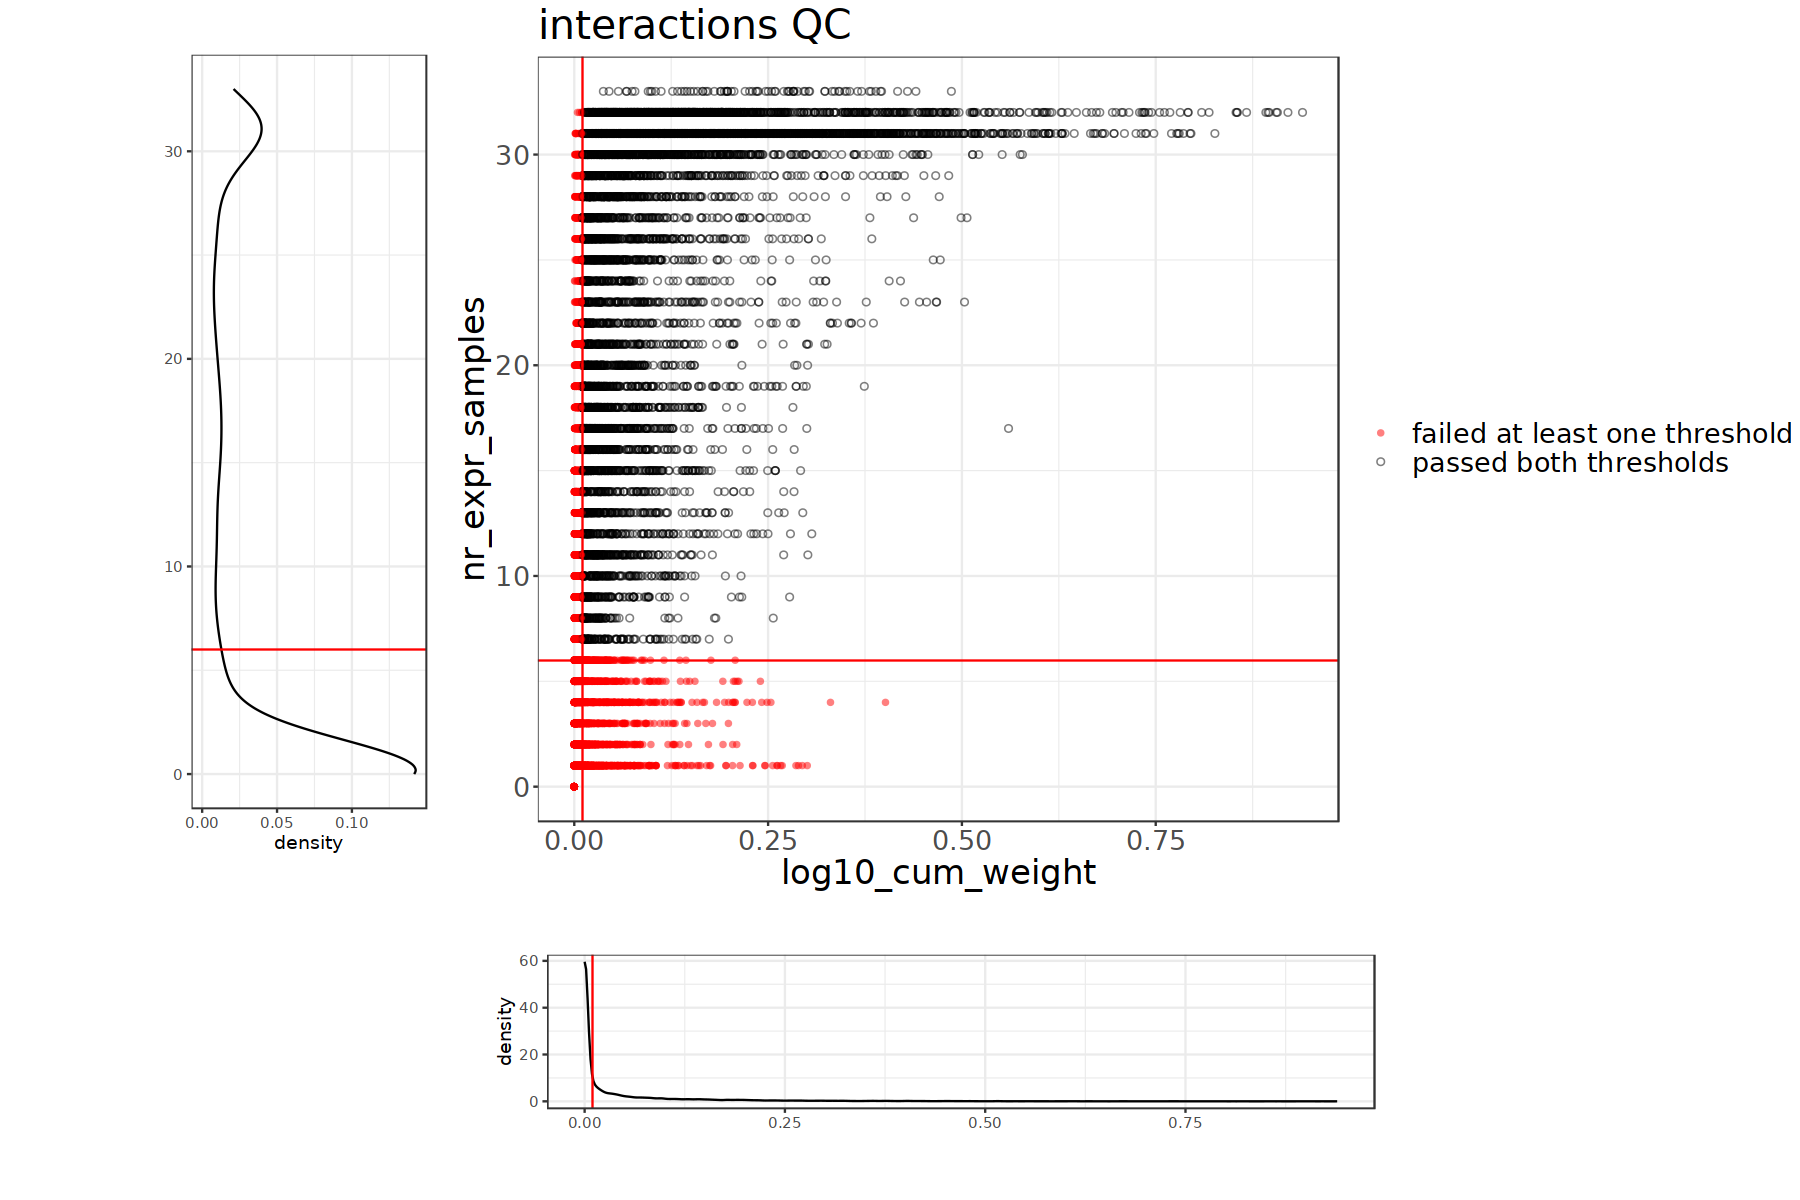

[1] "16638 out of 24408 interactions do not pass the thresholds for log10 cumulative interactions weight > 0.01 and number of expression samples > 6 . Also  14981  interactions didn't pass the discrepancy filter.  In total, 16820  bad quality interactions will be removed and 7588 good quality interactions will remain."


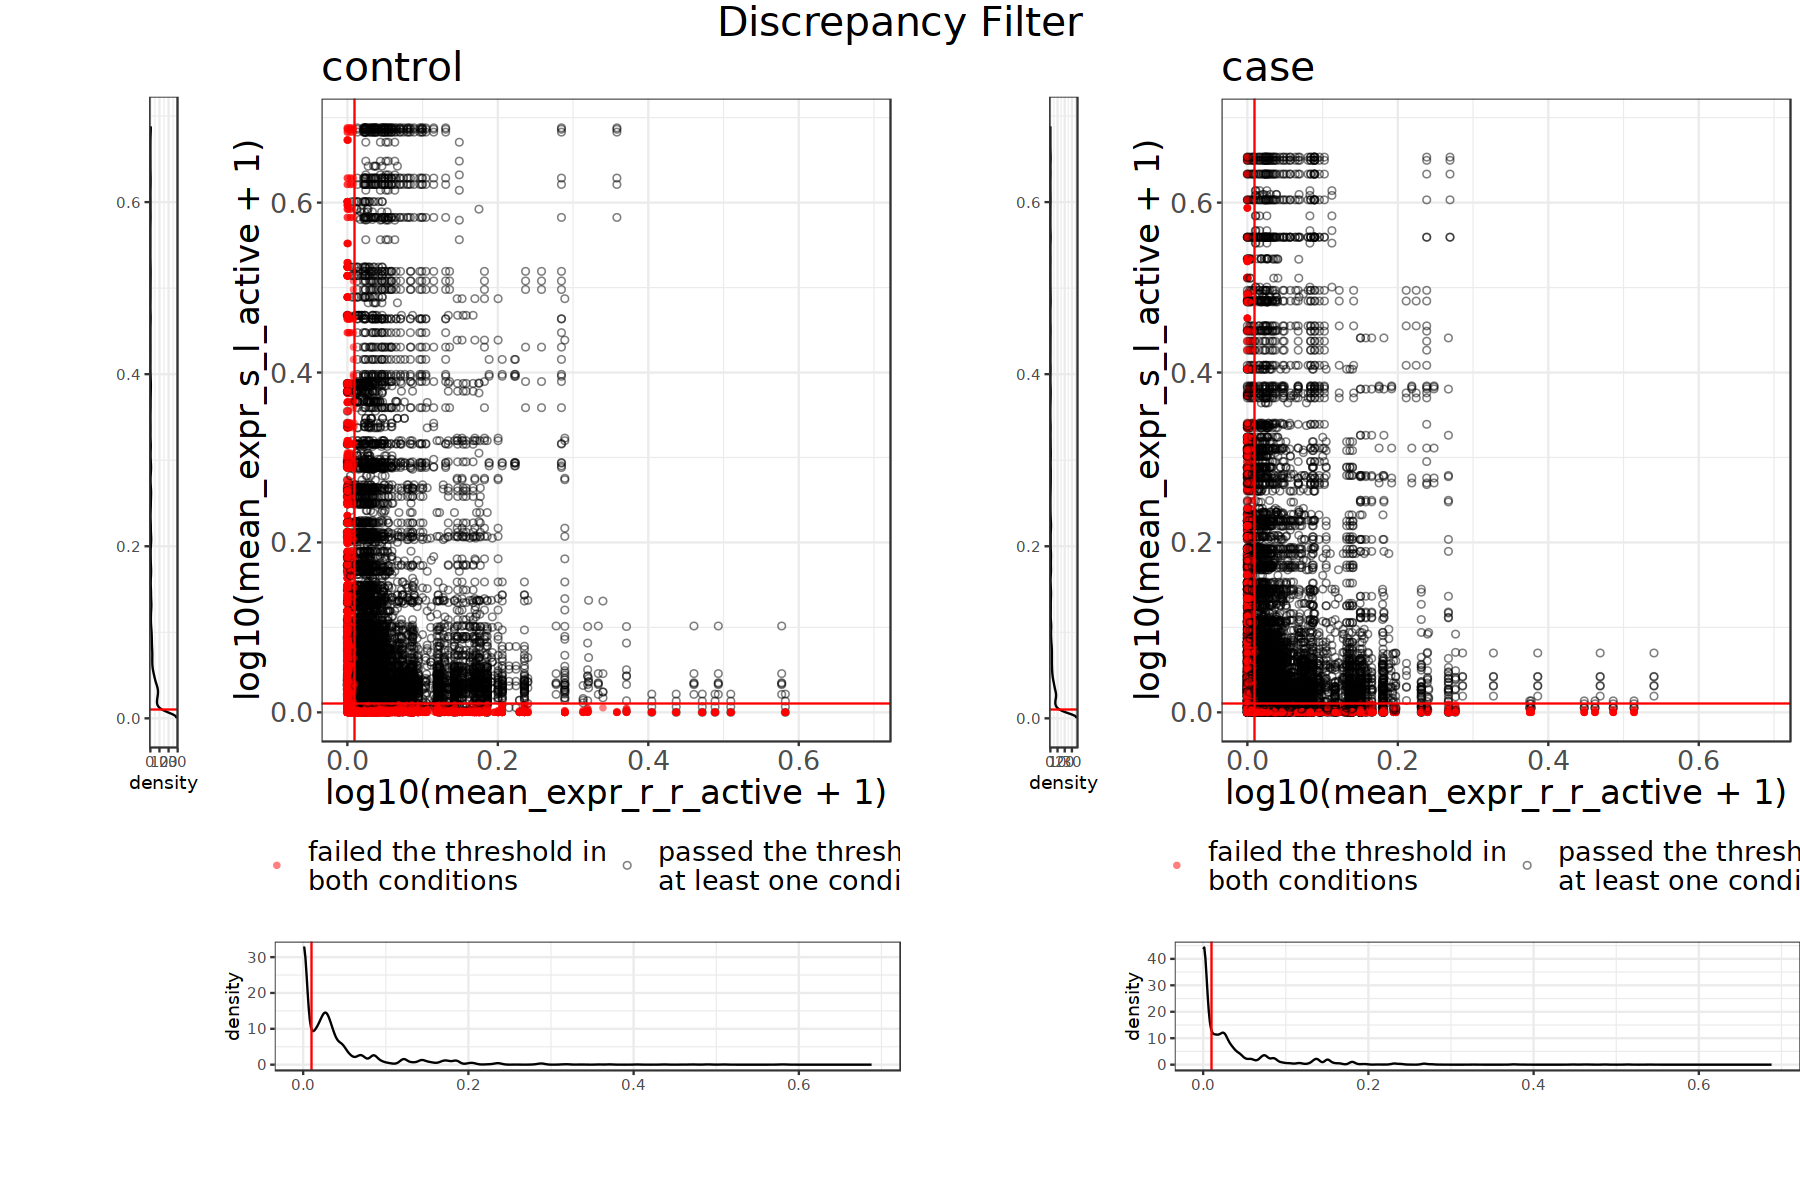

In [24]:
print("filter weak interactions")

options(repr.plot.height = 10
       ,repr.plot.width = 15)
interactions <- filter_interactions(comm_result = interactions
                             ,threshold_nr_expr_samples = threshold_nr_expr_samples
                             ,threshold_log10_cum_weight = threshold_log10_cum_weight
                             ,threshold_log10_meanexpr_per_condition = threshold_log10_meanexpr_per_condition
)

In [25]:
help(filter_interactions)

In [26]:
print(str(interactions$thresholds))
print(str(interactions$anno_interactions))

List of 6
 $ threshold_expr                        : num 0.05
 $ threshold_nr_active_cells             : num 0
 $ threshold_celltype_size               : num 4
 $ threshold_log10_cum_weight            : num 0.01
 $ threshold_nr_expr_samples             : num 6
 $ threshold_log10_meanexpr_per_condition: num 0.01
NULL
'data.frame':	24408 obs. of  27 variables:
 $ interaction_ID                            : chr  "HSPC:ADAM10_HSPC:AXL" "HSPC:ADAM15_HSPC:ITGA5" "HSPC:ADAM15_HSPC:ITGA9" "HSPC:ADAM15_HSPC:ITGAV" ...
 $ ligand_gene_name                          : chr  "ADAM10" "ADAM15" "ADAM15" "ADAM15" ...
 $ receptor_gene_name                        : chr  "AXL" "ITGA5" "ITGA9" "ITGAV" ...
 $ sending_cell_type                         : chr  "HSPC" "HSPC" "HSPC" "HSPC" ...
 $ receiving_cell_type                       : chr  "HSPC" "HSPC" "HSPC" "HSPC" ...
 $ mean_e_s_l_control                        : num  0.1731 0.0429 0.0429 0.0429 0.0429 ...
 $ mean_e_s_l_case                           : n

# Differential Communication

For calculating statistically significant differential interactions between the cases and the controls, we need to define an adjusted p-value threhsold and the log2 fold change threshold. 

In [27]:
# Set up log2 fold change threshold. The default value is 1
threshold_log2FC <- 1
print(paste("[absolute] threshold_log2FC >",threshold_log2FC))

[1] "[absolute] threshold_log2FC > 1"


In [28]:
# Set up FDR threshold. The default value is 0.1
threshold_fdr <- 0.1
print(paste("threshold_fdr <",threshold_fdr))

[1] "threshold_fdr < 0.1"


The `test_diff` function stores the thresholds in the `thresholds` list of the interactions object.

The `test_diff` function calculates a p-value for each interaction using a Wilcoxon test and adjusts for multiple testing using the FDR correction method. After that, the function checks whether the log2 fold change and the adjusted p-value thresholds were passed. An interactoin is considered significant if it passes both threshodls. The `test_diff` function stores the results as boolean vector to the `anno_interactions` list of the interactions object.

In [29]:
print("calculate differential communication")
interactions <- test_diff(comm_result = interactions
                                ,threshold_fdr = threshold_fdr
                                ,threshold_log2FC = threshold_log2FC
                                )
print(str(interactions$thresholds))
print(str(interactions$anno_interactions))

[1] "calculate differential communication"
List of 8
 $ threshold_expr                        : num 0.05
 $ threshold_nr_active_cells             : num 0
 $ threshold_celltype_size               : num 4
 $ threshold_log10_cum_weight            : num 0.01
 $ threshold_nr_expr_samples             : num 6
 $ threshold_log10_meanexpr_per_condition: num 0.01
 $ threshold_fdr                         : num 0.1
 $ threshold_log2FC                      : num 1
NULL
'data.frame':	24408 obs. of  32 variables:
 $ interaction_ID                            : chr  "HSPC:ADAM10_HSPC:AXL" "HSPC:ADAM15_HSPC:ITGA5" "HSPC:ADAM15_HSPC:ITGA9" "HSPC:ADAM15_HSPC:ITGAV" ...
 $ ligand_gene_name                          : chr  "ADAM10" "ADAM15" "ADAM15" "ADAM15" ...
 $ receptor_gene_name                        : chr  "AXL" "ITGA5" "ITGA9" "ITGAV" ...
 $ sending_cell_type                         : chr  "HSPC" "HSPC" "HSPC" "HSPC" ...
 $ receiving_cell_type                       : chr  "HSPC" "HSPC" "HSPC" "HSPC" 

# Visualisation

In [30]:
idx_up <- interactions$anno_interactions$log2FC_weights >1
idx_unchanged <- abs(interactions$anno_interactions$log2FC_weights)<=1
idx_down <- interactions$anno_interactions$log2FC_weights < -1
idx_sign <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign

### Volcano plot

We can now visualize the interactions with a volcano plot. 

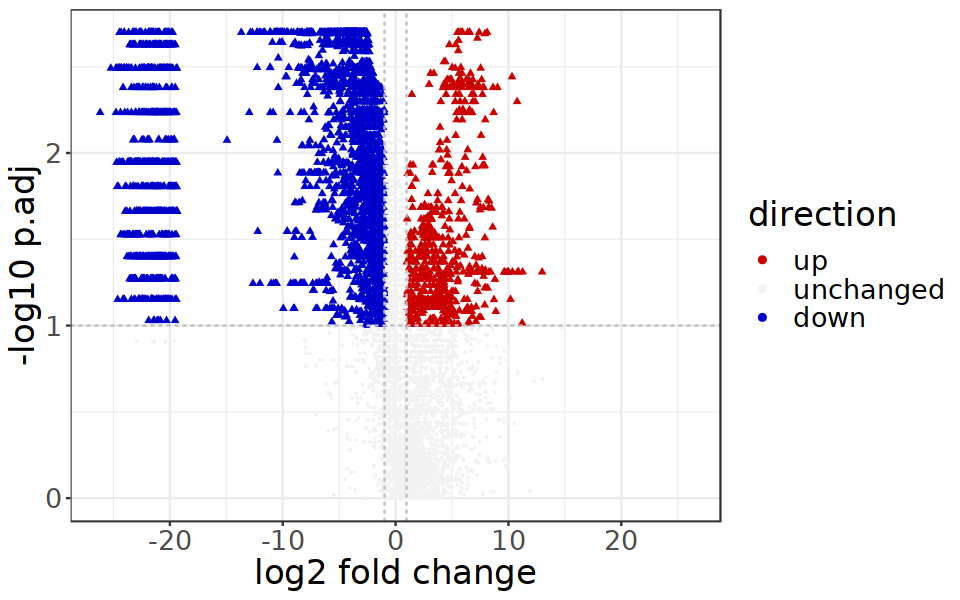

In [31]:
# volcano plot
options(repr.plot.height = 5
       ,repr.plot.width = 8)

idx_good <- interactions$anno_interactions$passed_QC_filter

df <- data.frame(log2FC = interactions$anno_interactions$log2FC_weights[idx_good]
                 ,y = -log10(interactions$anno_interactions$p.adj[idx_good])
                 ,significant = interactions$anno_interactions$sign[idx_good]
                )

df$direction <- "unchanged"
df$direction[df$significant & (df$log2FC > 1)] <- "up"
df$direction[df$significant & (df$log2FC < -1)] <- "down"
df$direction <- factor(df$direction
                      ,levels = c("up"
                                 ,"unchanged"
                                 ,"down")
                      ,ordered = TRUE)

xlab <- "log2 fold change"
ylab <- "-log10 p.adj"

xlim <- c(-max(abs(df$log2FC))
          ,max(abs(df$log2FC))
         )
ylim <- c(0, max(df$y))

p <- ggplot(data = df
            ,aes(x = log2FC
                 ,y = y
                 ,color = direction
                 ,size = significant
                 ,shape = significant
                ))+
geom_point()+
scale_color_manual(values = c("red3"
                               ,"gray95"
                               ,"blue3"))+
scale_size_manual(values = c(0.5, 1.5))+
guides(size = "none"
      ,shape = "none")+
xlab(xlab)+
ylab(ylab)+
xlim( xlim )+
ylim(ylim)+
theme_bw()+
theme(text = element_text(size=20))+
geom_vline(xintercept = interactions$thresholds$threshold_log2FC
          ,lty = 2
          ,color = "gray")+
geom_vline(xintercept = -interactions$thresholds$threshold_log2FC
          ,lty = 2
          ,color = "gray")+
geom_hline(yintercept = -log10(interactions$thresholds$threshold_fdr)
          ,lty = 2
          ,color = "gray")
p




   up unchanged down
1 658      3450 3480


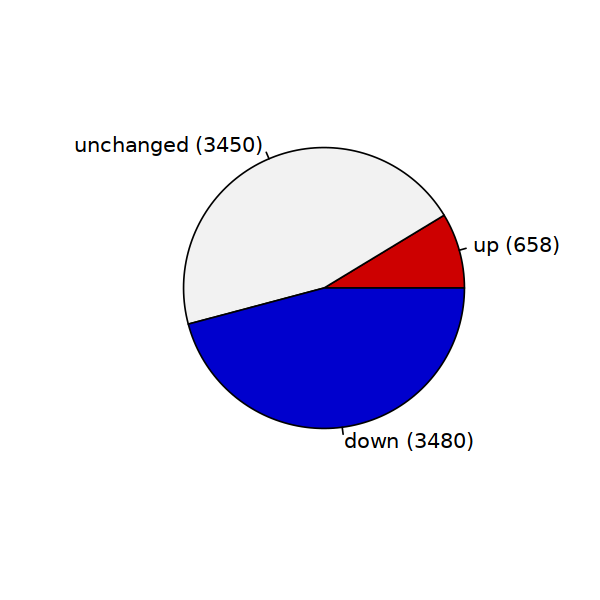

In [32]:
# pie chart
df <- data.frame(up = sum(idx_good & idx_sign & idx_up)
                ,unchanged = sum(idx_good & !idx_sign)
                , down = sum(idx_good & idx_sign & idx_down)
                )
print(df)

options(repr.plot.width = 5
       ,repr.plot.height = 5)
pie(unlist(df)
   ,labels = paste0(colnames(df)," (",unlist(df), ")")
   ,col = c("red3"
           ,"gray95"
           ,"blue3")) 

### Heatmap of top differential interactions

In [33]:
# heatmap of interactions weight of top differential interactions
# top adjusted p value
idx_topsign <- interactions$anno_interactions$p.adj %in% unique(sort(interactions$anno_interactions$p.adj))[1]
# all upregulated interactions
idx_topup <- interactions$anno_interactions$log2FC_weights > 1 & idx_topsign

# top 20 downregulated interactions
idx_topdown <- interactions$anno_interactions$log2FC_weights < -1 & idx_topsign
idx_topdown20 <- interactions$anno_interactions$interactions_ID %in% interactions$anno_interactions$interactions_ID[idx_topdown][1:20]

idx <- idx_topup | idx_topdown20
print(sum(idx))

[1] 0


In [34]:
# plot_heatmap2 <- function(comm_result
#                          ,which_interactions = NULL 
#                          # NULL if top and by_param are set 
#                          # or "all" 
#                          # or boolean vector with length of all interactions
#                          # e.g. "ADAM10" %in% Single_Cell_Result$anno_interactions$ligand_gene_name 
#                          # or "T" %in% Single_Cell_Result$anno_interactions$sending_cell_type
#                          #,top = NULL 
#                          ,by_param 
#                          # passed_QC_filter
#                          # passed_FDR_threshold
#                          # passed_log2FC_threshold
#                          # sign
#                          ,values_to_plot 
#                          # weights, 
#                          # expr_l_s_active, 
#                          # expr_r_r_active, 
#                          # nr_l_s_active, 
#                          # nr_r_r_active, 
#                          # phi, 
#                          # phi_l_s, 
#                          # phi_r_r, 
#                          # p, 
#                          # p_l_s, 
#                          # p_r_r
#                          ,row_font_size = 8
#                          ,color_case = "#7C001F" # "darkred"
#                          ,color_control = "#7AC5CD" # "CadetBlue3"
#                          ,color_values = NULL # or 
# ){
        
#         df <- as.matrix(comm_result[[values_to_plot]])
#         #print(str(df))
#         if(is.null(which_interactions)){
#                 idx_interactions <- comm_result$anno_interactions[,by_param] & (!is.na(comm_result$anno_interactions[,by_param]))
#         } else if(class(which_interactions) == 'logical'){
#                 idx_interactions <- which_interactions
#         } else if(which_interactions == "all"){
#                 idx_interactions <- rep(TRUE
#                                  ,nrow(df))
#         } else {
#                 stop("ERROR: parameter which_interactions can be either NULL or 'all' or a logical vector.")
#         }
#         #print(str(idx_interactions))
        
#         col_samples <- sapply(comm_result$anno_samples$case_or_control ## add to object; create column with "case" and "control"
#                               ,function(i){
#                                       ifelse(grepl("case"
#                                                    ,i)
#                                              ,color_case
#                                              ,color_control
#                                       )
#                               })
#         #print(str(col_samples))
        
#         if(is.null(color_values)){
#                 my_color <- colorRamp2(seq(0, 1, length = 5), c("white", "red", "red4",  "darkred", "black"))
#         } else my_color <-  color_values
        
#         h <- Heatmap(df[idx_interactions,]
#                      ,name = values_to_plot
#                      ,row_names_gp = grid::gpar(fontsize = row_font_size)
#                      ,col = my_color
#                      ,column_names_side = "top"
#                      ,column_names_gp = gpar(col = col_samples)
#                      ,heatmap_legend_param = list(direction = "horizontal"
#                      )
#         )
#         plot(h
#              ,heatmap_legend_side = "bottom")
# }

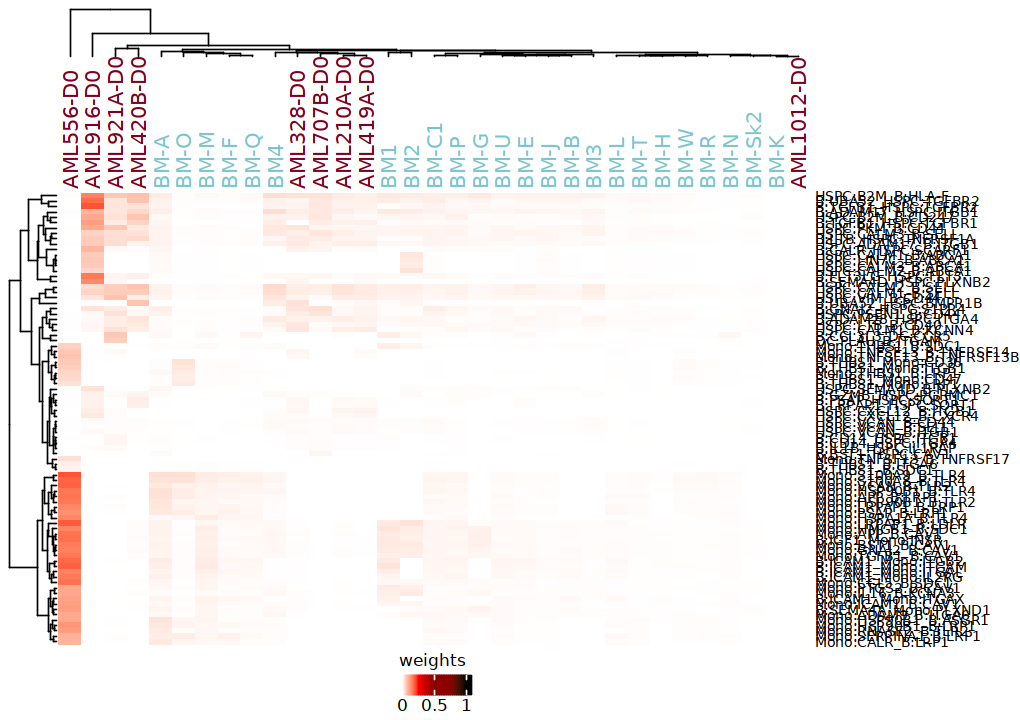

In [55]:
options(repr.plot.height = 6
       ,repr.plot.width = 8.5)
plot_heatmap(interactions
            ,which_interactions = idx
            ,values_to_plot = "weights")

#### Individual parameters

In [36]:
cell_types <- unique(interactions$anno_cells$cell_type)
print(cell_types)

[1] "HSPC" "Mono" "DC"   "Ery"  "T"    "B"   


  cell_type log2FC_rho
1      HSPC  3.2165730
3        DC  1.1606928
2      Mono  0.6717878
4       Ery -1.3613534
6         B -1.5796444
5         T -2.7719114


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


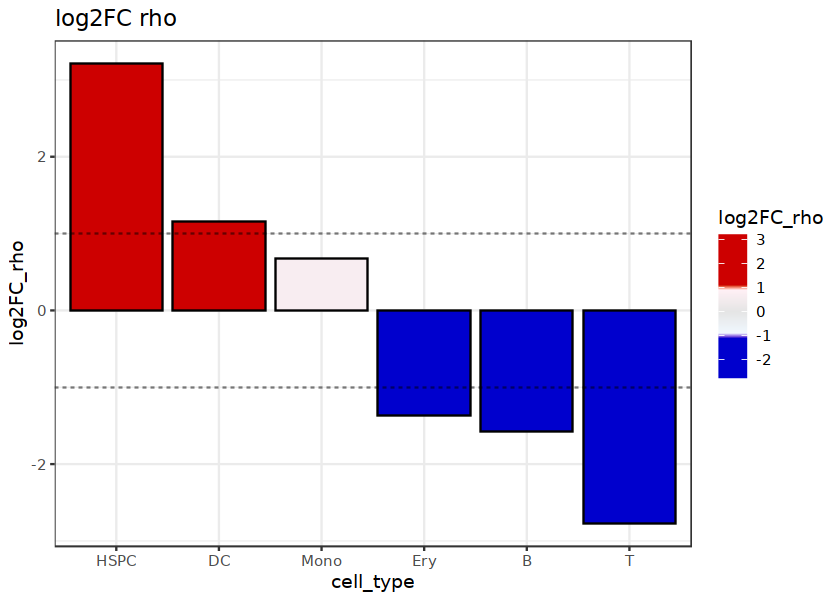

In [37]:
# plot log2FC rho for cell types
df <- data.frame(cell_type = cell_types)
df$log2FC_rho <- sapply(cell_types
                       ,function(ct){
                           idx_ct <- interactions$anno_interactions$sending_cell_type == ct # just take the sending
                         interactions$anno_interactions$log2FC_rho_s[idx_ct][1] # just take the first one
                       })
df <- df[order(df$log2FC_rho,decreasing = TRUE),]
df$cell_type <- factor(df$cell_type
                         ,levels = df$cell_type
                         ,ordered = TRUE)
print(df)

my_values <- c(min(df$log2FC_rho),-1.1,-0.9,0,0.9,1.1,max(df$log2FC_rho))
my_colors <- c("blue3","blue3","aliceblue","gray90","lavenderblush","red3","red3")
names(my_colors) <- my_values
resc_values <- rescale(as.numeric(names(my_colors)))

options(repr.plot.width = 7
       ,repr.plot.height = 5)
ggplot(data = df
      ,aes(x = cell_type
          ,y = log2FC_rho
          ,fill = log2FC_rho)
      )+
geom_col(color = "black")+
scale_fill_gradientn(colours = my_colors
                           ,values = resc_values
                          )+
geom_hline(yintercept = c(-1,1)
          ,lty = 2
          ,lwd = 0.5
          ,alpha = 0.5)+
ggtitle("log2FC rho")+
theme_bw()

'data.frame':	24392 obs. of  2 variables:
 $ cell_type: Ord.factor w/ 6 levels "HSPC"<"DC"<"Mono"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ log2FC   : Ord.factor w/ 3 levels "log2FC > 1"<"unchanged"<..: 1 1 1 1 1 1 1 1 1 1 ...
NULL


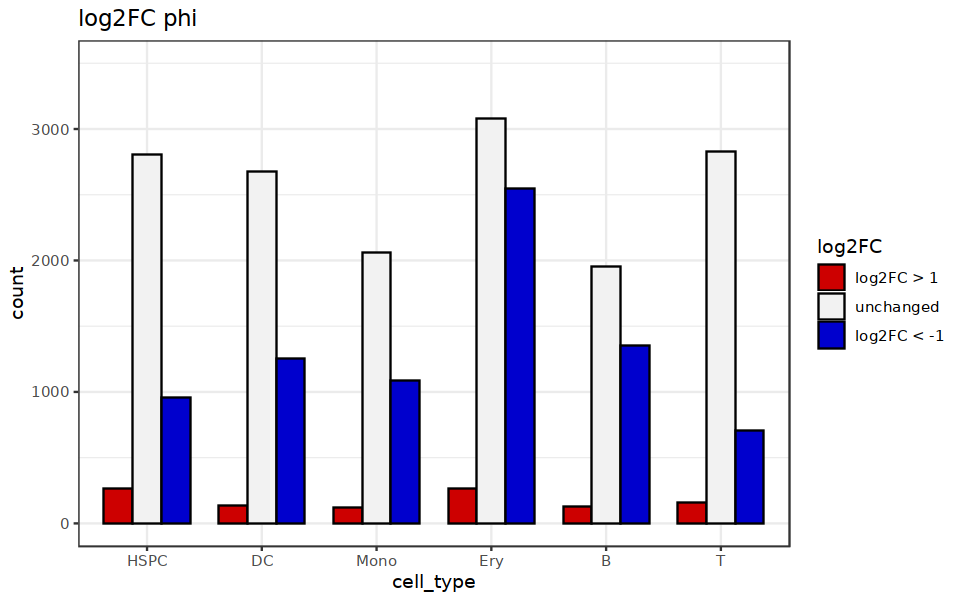

In [38]:
# phi log2FC by cell type
df <- lapply(c("up"
                    ,"unchanged"
                    ,"down")
                   ,function(dir){
                       if(dir == "up"){
                           idx_send <-interactions$anno_interactions$log2FC_phi_s_l > 1 & idx_good
                           idx_rec <- interactions$anno_interactions$log2FC_phi_r_r > 1 & idx_good
                           my_df <- data.frame(cell_type = c(interactions$anno_interactions$sending_cell_type[idx_send]
                                                             ,interactions$anno_interactions$receiving_cell_type[idx_rec])
                                               ,log2FC = rep(dir,sum(idx_send) + sum(idx_rec))
                                              )
                           my_df
                       }else if(dir == "down"){
                           idx_send <-interactions$anno_interactions$log2FC_phi_s_l < -1 
                           idx_rec <- interactions$anno_interactions$log2FC_phi_r_r < -1
                           my_df <- data.frame(cell_type = c(interactions$anno_interactions$sending_cell_type[idx_send]
                                                             ,interactions$anno_interactions$receiving_cell_type[idx_rec])
                                               ,log2FC = rep(dir,sum(idx_send) + sum(idx_rec))
                                              )
                           my_df
                       } else {
                           idx_send <- abs(interactions$anno_interactions$log2FC_phi_s_l) > 1 
                           idx_rec <- abs(interactions$anno_interactions$log2FC_phi_r_r) > 1
                           my_df <- data.frame(cell_type = c(interactions$anno_interactions$sending_cell_type[idx_send]
                                                             ,interactions$anno_interactions$receiving_cell_type[idx_rec])
                                               ,log2FC = rep(dir,sum(idx_send) + sum(idx_rec))
                                              )
                           my_df
                       }
                       
                   }
                       )
df <- rbind(df[[1]],df[[2]],df[[3]])
df$cell_type <- factor(df$cell_type
                         ,levels = c("HSPC"
                                     ,"DC"
                                    ,"Mono"
                                    ,"Ery"
                                    ,"B"
                                    ,"T")
                         ,ordered = TRUE)
df$log2FC <- factor(df$log2FC
                      ,levels = c("up"
                                 ,"unchanged"
                                 ,"down")
                       ,labels = c("log2FC > 1"
                                  ,"unchanged"
                                  ,"log2FC < -1")
                      ,ordered = TRUE)
print(str(df))

           
options(repr.plot.width = 8
       ,repr.plot.height = 5)
p <- ggplot(data = df
          ,aes(x = cell_type
               ,fill = log2FC
              )
           )+
    geom_bar(position = "dodge"
            ,width=.75
            ,color = "black")+
scale_fill_manual(values = c("red3","gray95","blue3"))+
    ggtitle("log2FC phi")+
    ylim(c(0,3500))+
    theme_bw()

p

'data.frame':	21995 obs. of  2 variables:
 $ cell_type: Ord.factor w/ 6 levels "HSPC"<"DC"<"Mono"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ log2FC   : Ord.factor w/ 3 levels "log2FC > 1"<"unchanged"<..: 1 1 1 1 1 1 1 1 1 1 ...
NULL


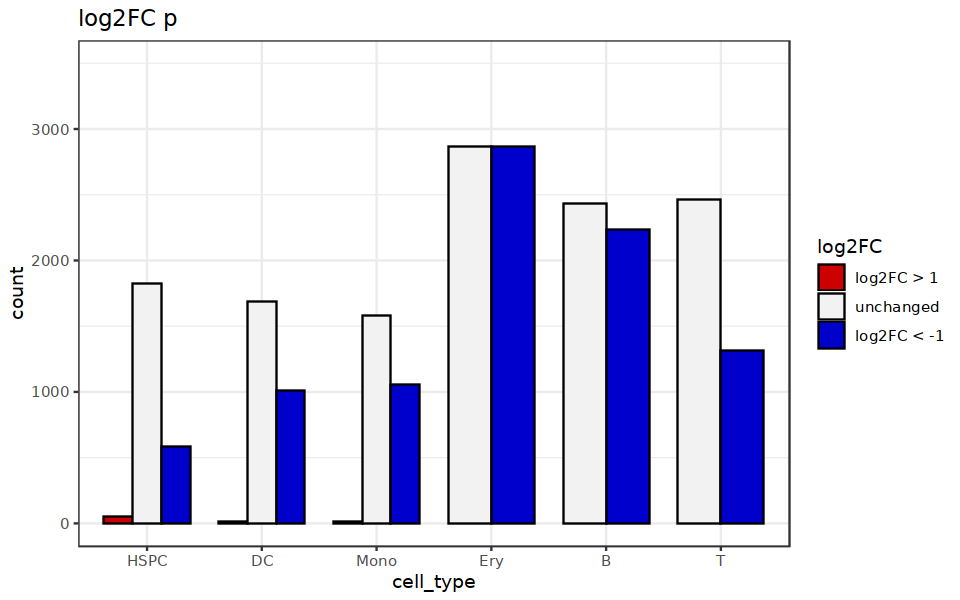

In [39]:
# phi log2FC by cell type
df <- lapply(c("up"
                    ,"unchanged"
                    ,"down")
                   ,function(dir){
                       if(dir == "up"){
                           idx_send <-interactions$anno_interactions$log2FC_p_s_l > 1 & idx_good
                           idx_rec <- interactions$anno_interactions$log2FC_p_r_r > 1 & idx_good
                           my_df <- data.frame(cell_type = c(interactions$anno_interactions$sending_cell_type[idx_send]
                                                             ,interactions$anno_interactions$receiving_cell_type[idx_rec])
                                               ,log2FC = rep(dir,sum(idx_send) + sum(idx_rec))
                                              )
                           my_df
                       }else if(dir == "down"){
                           idx_send <-interactions$anno_interactions$log2FC_p_s_l < -1 
                           idx_rec <- interactions$anno_interactions$log2FC_p_r_r < -1
                           my_df <- data.frame(cell_type = c(interactions$anno_interactions$sending_cell_type[idx_send]
                                                             ,interactions$anno_interactions$receiving_cell_type[idx_rec])
                                               ,log2FC = rep(dir,sum(idx_send) + sum(idx_rec))
                                              )
                           my_df
                       } else {
                           idx_send <- abs(interactions$anno_interactions$log2FC_p_s_l) > 1 
                           idx_rec <- abs(interactions$anno_interactions$log2FC_p_r_r) > 1
                           my_df <- data.frame(cell_type = c(interactions$anno_interactions$sending_cell_type[idx_send]
                                                             ,interactions$anno_interactions$receiving_cell_type[idx_rec])
                                               ,log2FC = rep(dir,sum(idx_send) + sum(idx_rec))
                                              )
                           my_df
                       }
                       
                   }
                       )
df <- rbind(df[[1]],df[[2]],df[[3]])
df$cell_type <- factor(df$cell_type
                         ,levels = c("HSPC"
                                     ,"DC"
                                    ,"Mono"
                                    ,"Ery"
                                    ,"B"
                                    ,"T")
                         ,ordered = TRUE)
df$log2FC <- factor(df$log2FC
                      ,levels = c("up"
                                 ,"unchanged"
                                 ,"down")
                    ,labels = c("log2FC > 1"
                               ,"unchanged"
                               ,"log2FC < -1")
                      ,ordered = TRUE)
print(str(df))

           
options(repr.plot.width = 8
       ,repr.plot.height = 5)
p <- ggplot(data = df
          ,aes(x = cell_type
               ,fill = log2FC
              )
           )+
    geom_bar(position = "dodge"
            ,width=.75
            ,color = "black")+
scale_fill_manual(values = c("red3","gray95","blue3"))+
    ggtitle("log2FC p")+
    ylim(c(0,3500))+
    theme_bw()

p

### Classes of interactions

In this section, we will check which of the individual components (rho, phi, p) are driving the change of the interactions. For this, we will combine following forest plots: 
- log2 fold change of the interaction weight (`w`)
- log2 fold change of the cell type abundance of the sending cell type (`rho_s`)
- log2 fold change of the active fraction of the sending cell type expressing the ligand (`phi_s_l`)
- log2 fold change of the expression of the sending cell type expressing the ligand (`p_s_l`)
- log2 fold change of the cell type abundance of the receiving cell type (`rho_r`)
- log2 fold change of the active fraction of the receiving cell type expressing the receptor (`phi_r_r`)
- log2 fold change of the expression of the receiving cell type expressing the receptor (`p_r_r`)

We will first explore the interaction that were unchanged. We will start with the interactions that had a trully unchanged log2 fold change of the weight (i.e. -1 < `log2FC_weight` < 1), and then plot the interactions with eigther up- or down-regulated log2 fold change of the weight, which though didn't pass the adjusted p-value threshold.

#### Unchanged

In [40]:
idx_of_interest <- !idx_sign & idx_good
sum(idx_of_interest)

[1] 3450

 No log2FC of the w.

In [41]:
idx_w <- abs(interactions$anno_interactions$log2FC_weights) < 1
sum(idx_of_interest & idx_w)

[1] 1452

[1] "rho"  "none" "phi"  "none" "p"    "none"
[1] "8 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "none"
[1] "299 interactions"
[1] "rho"  "both" "phi"  "none" "p"    "none"
[1] "601 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "none"
[1] "7 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "none"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "one" 
[1] "4 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "one" 
[1] "5 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "both"
[1] "1 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "one" 
[1] "1 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "one" 
[1] "50 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "one"  "p"    "none"
[1] "101 interactions"
[1] "rho" "one" "phi" "one" "p"   "one"
[1] "39 interac

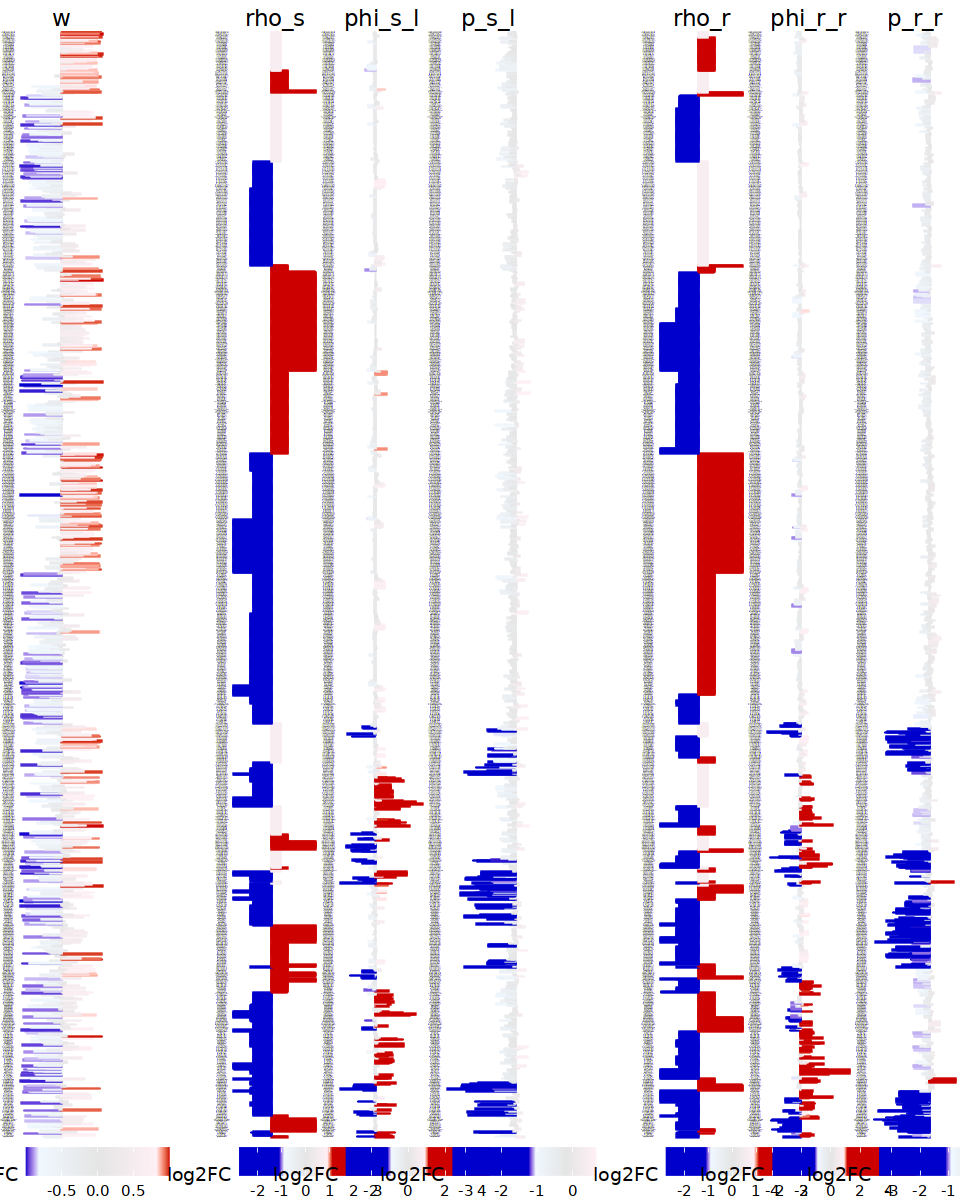

In [42]:
options(repr.plot.height = 10
       ,repr.plot.width = 8)
plot_all_forests(idx_of_interest & idx_w
                ,my_anno_interactions = interactions$anno_interactions)

ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!

Log2FC of w > 1, but is not significant.

In [43]:
idx_w <- interactions$anno_interactions$log2FC_weights > 1
sum(idx_of_interest & idx_w)

[1] 1716

[1] "rho"  "none" "phi"  "none" "p"    "none"
[1] "148 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "none"
[1] "356 interactions"
[1] "rho"  "both" "phi"  "none" "p"    "none"
[1] "610 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "none"
[1] "30 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "none"
[1] "1 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "one" 
[1] "12 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "one" 
[1] "7 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "one" 
[1] "1 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "both"
[1] "1 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "one" 
[1] "32 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "one"  "p"    "none"
[1] "117 interactions"
[1] "rho" "one" "phi" "one" "p"   "one"
[1] "7 inte

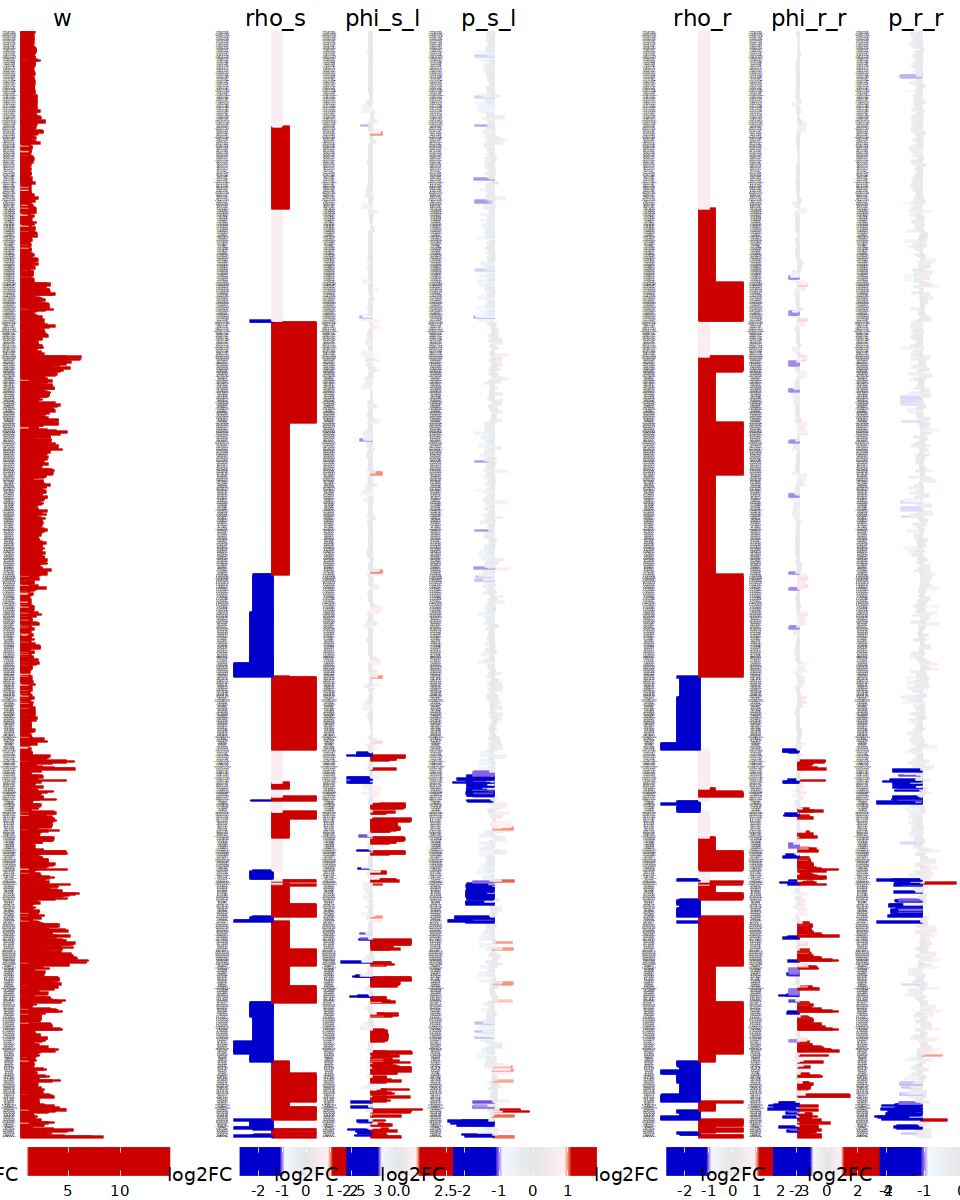

In [44]:
options(repr.plot.height = 10
       ,repr.plot.width = 8)
plot_all_forests(idx_of_interest & idx_w
                ,my_anno_interactions = interactions$anno_interactions)

ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!

Log2FC of w < -1, but is not significant.

In [45]:
idx_w <- interactions$anno_interactions$log2FC_weights < -1
sum(idx_of_interest & idx_w)

[1] 282

[1] "rho"  "none" "phi"  "none" "p"    "none"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "none"
[1] "51 interactions"
[1] "rho"  "both" "phi"  "none" "p"    "none"
[1] "43 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "none"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "none"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "one" 
[1] "0 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "one" 
[1] "2 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "one" 
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "one" 
[1] "15 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "both"
[1] "1 interactions"
[1] "rho"  "one"  "phi"  "one"  "p"    "none"
[1] "19 interactions"
[1] "rho" "one" "phi" "one" "p"   "one"
[1] "22 interactio

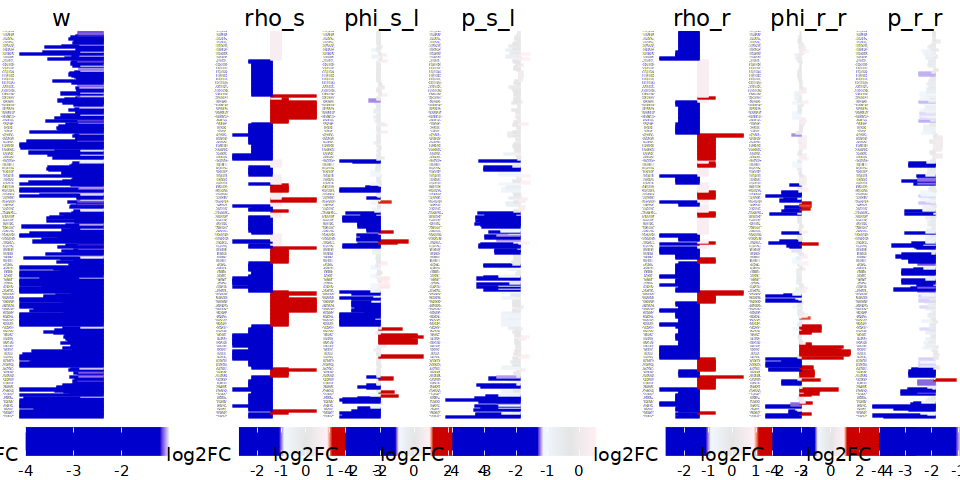

In [46]:
options(repr.plot.height = 4
       ,repr.plot.width = 8)
plot_all_forests(idx_of_interest & idx_w
                ,my_anno_interactions = interactions$anno_interactions)

ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!

#### Up-regulated

Now we will explore the interactions in which the `log2FC_weights` passed the upper log2 fold change threshodl, but didn't pass the adjusted p-value threshold.

In [47]:
idx_of_interest <- idx_good & idx_sign & idx_up
sum(idx_of_interest)

[1] 658

[1] "rho"  "none" "phi"  "none" "p"    "none"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "none"
[1] "178 interactions"
[1] "rho"  "both" "phi"  "none" "p"    "none"
[1] "273 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "none"
[1] "3 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "none"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "one" 
[1] "0 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "one" 
[1] "6 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "one" 
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "one" 
[1] "36 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "both"
[1] "2 interactions"
[1] "rho"  "one"  "phi"  "one"  "p"    "none"
[1] "21 interactions"
[1] "rho" "one" "phi" "one" "p"   "one"
[1] "20 interact

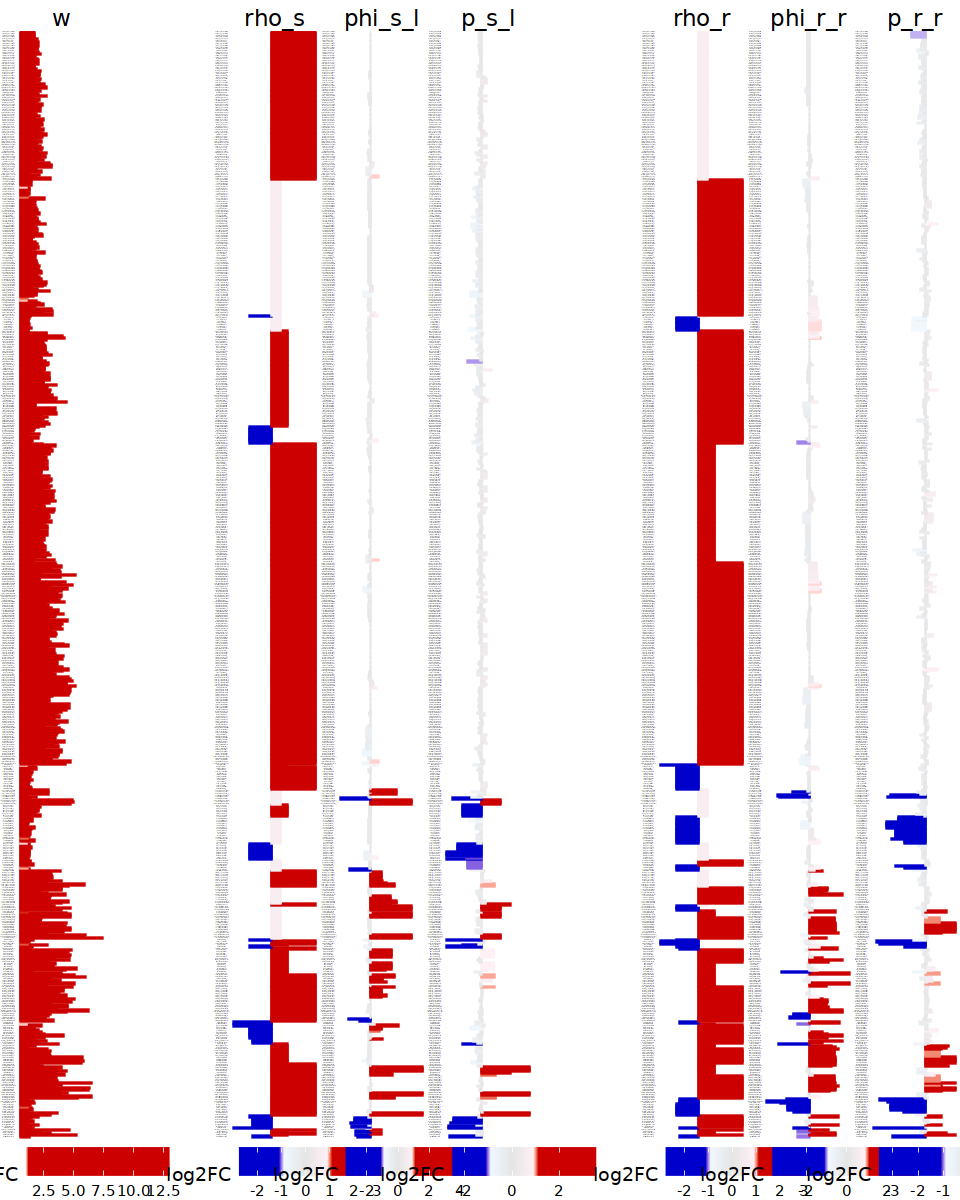

In [48]:
options(repr.plot.height = 10
       ,repr.plot.width = 8)
plot_all_forests(idx_of_interest
                ,my_anno_interactions = interactions$anno_interactions)

ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!

#### Down-regulated

Here we will explore the interactions in which the `log2FC_weights` passed the lower log2 fold change threshodl, but didn't pass the adjusted p-value threshold.

In [49]:
idx_of_interest <- idx_good & idx_sign & idx_down
sum(idx_of_interest)

[1] 3480

[1] "rho"  "none" "phi"  "none" "p"    "none"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "none"
[1] "381 interactions"
[1] "rho"  "both" "phi"  "none" "p"    "none"
[1] "1024 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "none"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "none"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "one" 
[1] "0 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "one" 
[1] "18 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "one" 
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "one" 
[1] "65 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "both"
[1] "3 interactions"
[1] "rho"  "one"  "phi"  "one"  "p"    "none"
[1] "56 interactions"
[1] "rho" "one" "phi" "one" "p"   "one"
[1] "316 inter

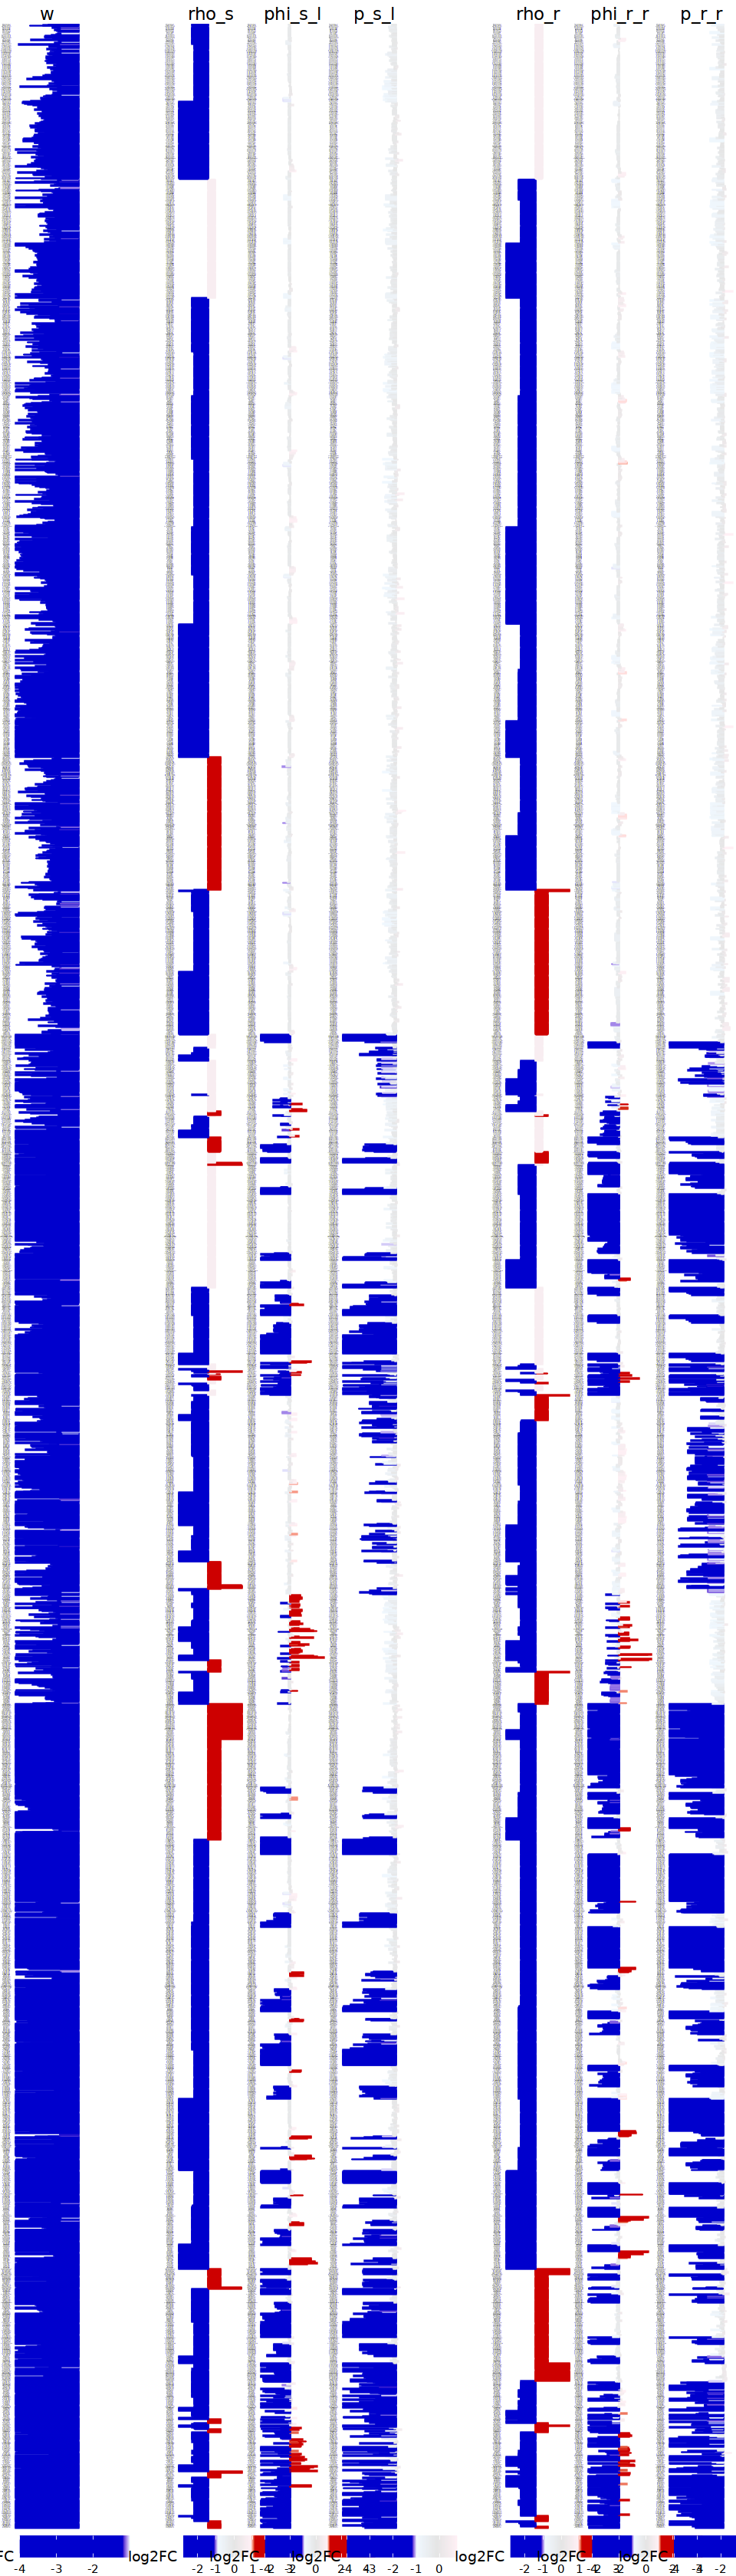

In [50]:
options(repr.plot.height = 28
       ,repr.plot.width = 8)
plot_all_forests(idx_of_interest
                ,my_anno_interactions = interactions$anno_interactions)

ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!

### Graphs for each cell type

In this section, we will explore the up- and down-regulated interactions for each cell type. We will take the significantly differential interactions and plot the graphs of up- and down-regulated interactions per cell type, with nodes being cell types and the interactions being mean `log2FC_weigt` of the interactions connecting two corresponding cell types. We will also plot the forest plots for the up- and down-regulated interactions of each cell type.

In [51]:
# below is changed
# plot_mean_log2FCw_graph ==>  mean_log2FCw_graph

# plot_mean_log2FCw_graph

In [52]:
# library(igraph)

In [53]:
# plot_mean_log2FCw_graph <- function(my_interactions
#                                     ,my_idx
#                                     ,direction){
        
#         cell_types <- unique(my_interactions$anno_cells$cell_type)
#         health_status <- unique(my_interactions$anno_samples$health_status)
        
#         dummy_min <- 0.00000001
        
#         # mean weight of interactions. Sign 
#         # prepare adjusency matrix
#         mean_mat <- matrix(NA
#                            ,nrow = length(cell_types)
#                            ,ncol = length(cell_types))
#         rownames(mean_mat) <- cell_types
#         colnames(mean_mat) <- cell_types
        
#         # calculate mean weight per pair of sending and receiving cell types and per condition
#         for(i in cell_types){
#                 for(j in cell_types){
#                         idx_send <- my_interactions$anno_interactions$sending_cell_type == i
#                         idx_rec <- my_interactions$anno_interactions$receiving_cell_type == j
                        
#                         idx_interaction <- my_idx & idx_send & idx_rec
                        
#                         #print(i)
#                         #print(j)
#                         #print(sum(idx_interaction))
                        
#                         ifelse(sum(idx_interaction) != 0
#                                ,{means <- mean(my_interactions$anno_interactions$log2FC_weights[idx_interaction]
#                                )
#                                mean_mat[i,j]  <- mean(means[means != 0])
#                                }
#                                ,mean_mat[i,j]  <- 0
#                         )
                        
                        
                        
#                 }
#         }
        
#         #print(mean_w_mat)
        
#         interaction.width <- unlist(lapply(1:nrow(mean_mat),function(i) mean_mat[i,]))
#         #print("head(interaction.width)")
#         #print(head(interaction.width))
        
        
#         max_value <- max(ceiling(abs(interaction.width)))
        
#         #print(max_value)
#         ifelse(direction == "down"
#                ,color_palette  <-  c("white","blue","blue3","black")
#                ,color_palette  <-  c("white","red","red3","black")
#         )
        
#         col <- colorRampPalette(color_palette)(max_value)
        
#         # construct graph
#         g <- graph(c(t(my_interactions$anno_interactions[#my_idx
#                 ,c("sending_cell_type","receiving_cell_type")]
#         )))
#         #g
        
#         #print(g[])
        
#         g_simp <- igraph::simplify(g, remove.loops = FALSE)
#         #print(g_simp)
        
#         options(repr.plot.width = 7
#                 ,repr.plot.height = 7)
        
        
#         my_interaction.width <- abs(interaction.width) + dummy_min
#         print("my_interaction.width")
#         print(my_interaction.width)
        
#         p <- plot(g_simp
#                   #,main = hs
#                   ,layout = layout_in_circle(g_simp)
#                   ,interaction.curved=0.05
#                   ,vertex.shape="none"
#                   ,vertex.label.cex = 2
#                   ,edge.color = col[round(my_interaction.width,digits = 0)+1]
#                   ,edge.width = my_interaction.width 
#         )
        
#         p
        
        
        
        
        
        
#         return(p)
# }

Warning message in dir.create("figures"):
“'figures' already exists”


[1] "HSPC"
[1] "down"
[1] 100
[1] "HSPC"
[1] "up"
[1] 578


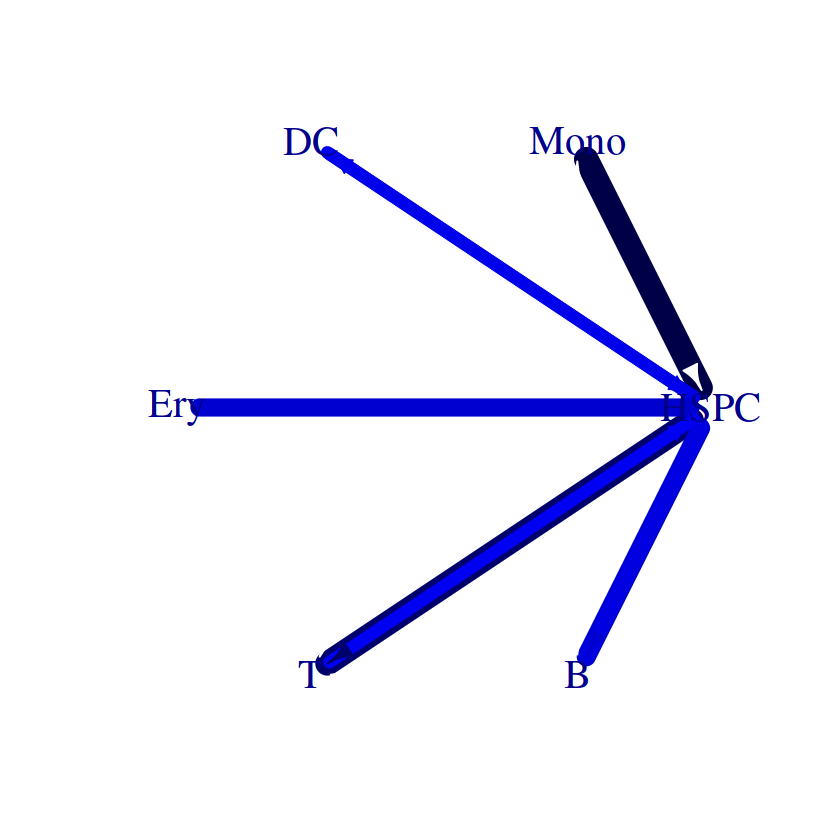

[1] "Mono"
[1] "down"
[1] 881


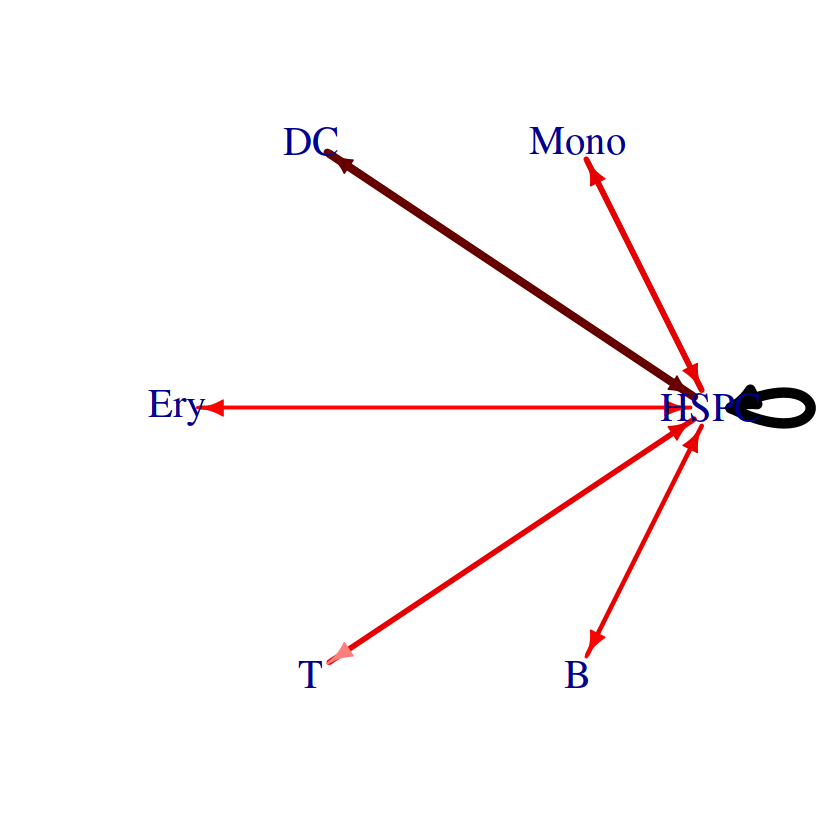

[1] "Mono"
[1] "up"
[1] 267


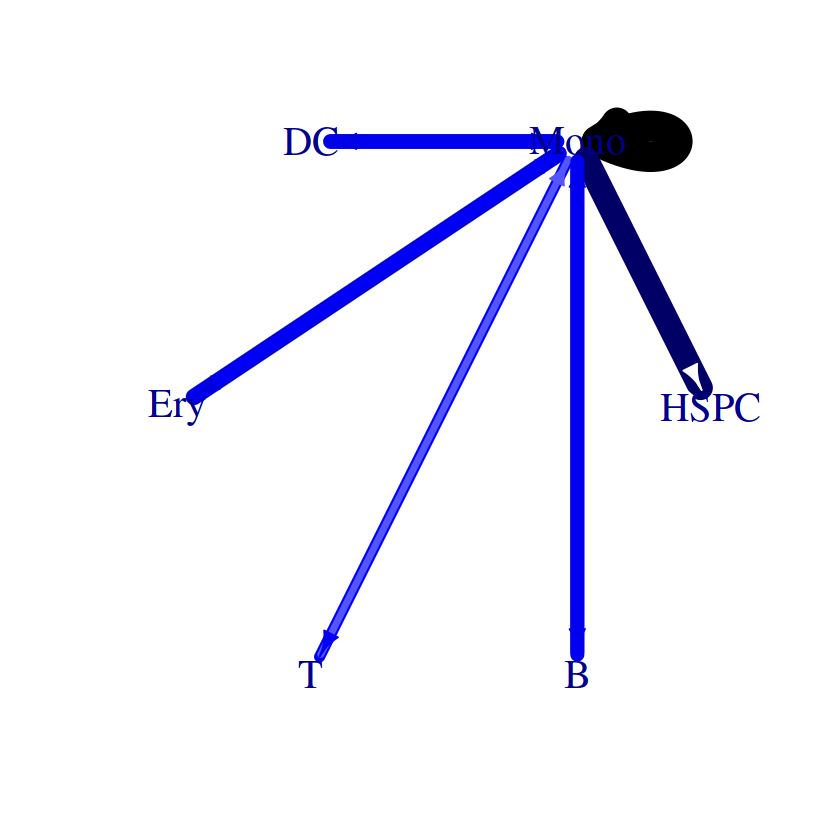

[1] "DC"
[1] "down"
[1] 871


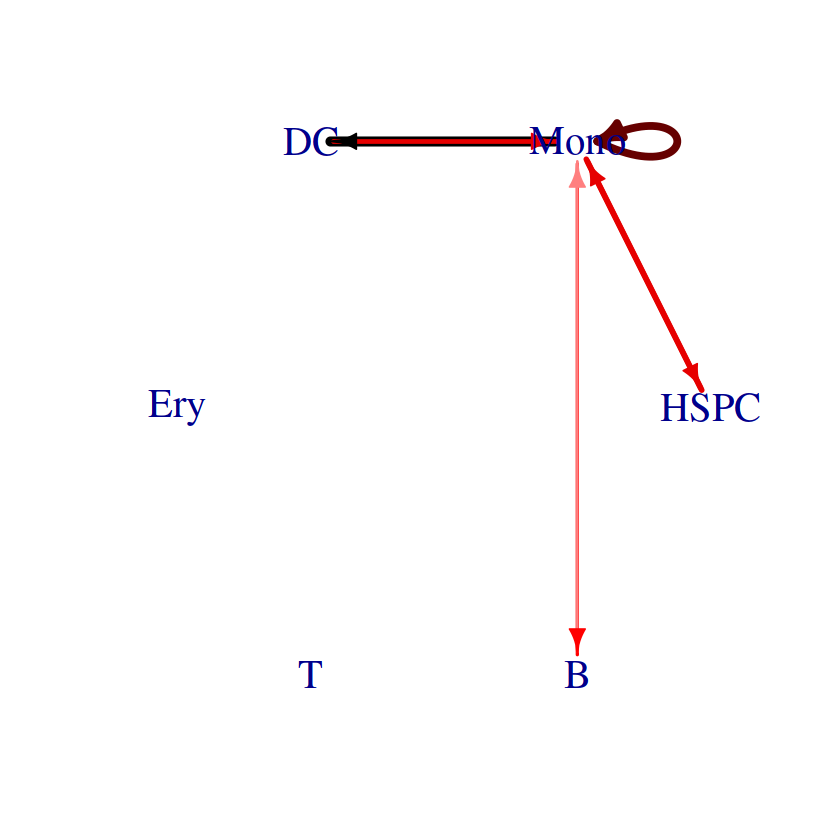

[1] "DC"
[1] "up"
[1] 186


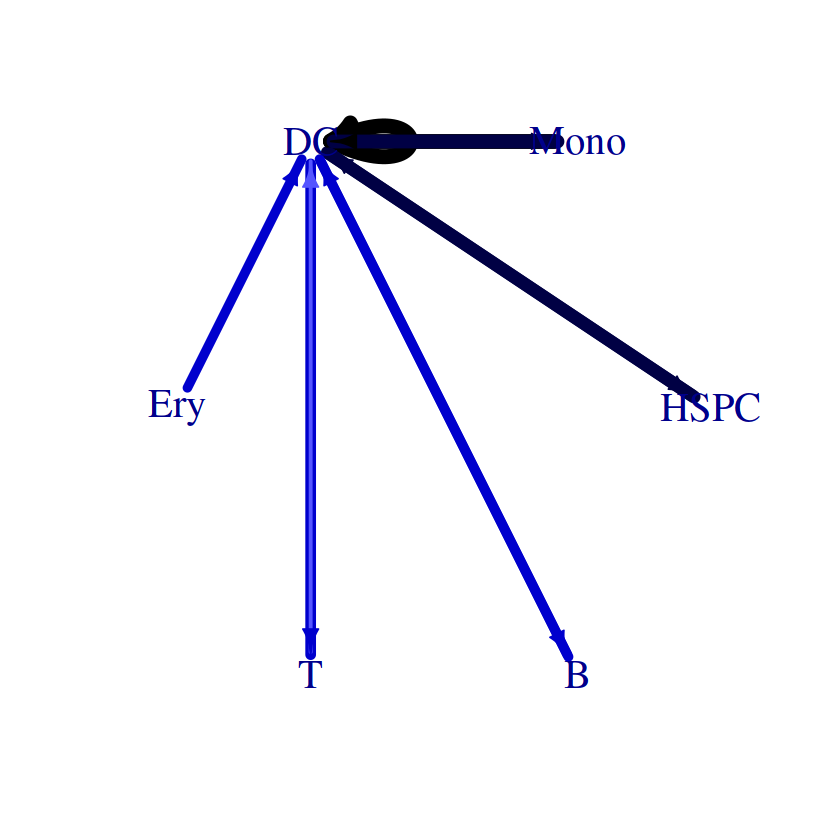

[1] "Ery"
[1] "down"
[1] 1767


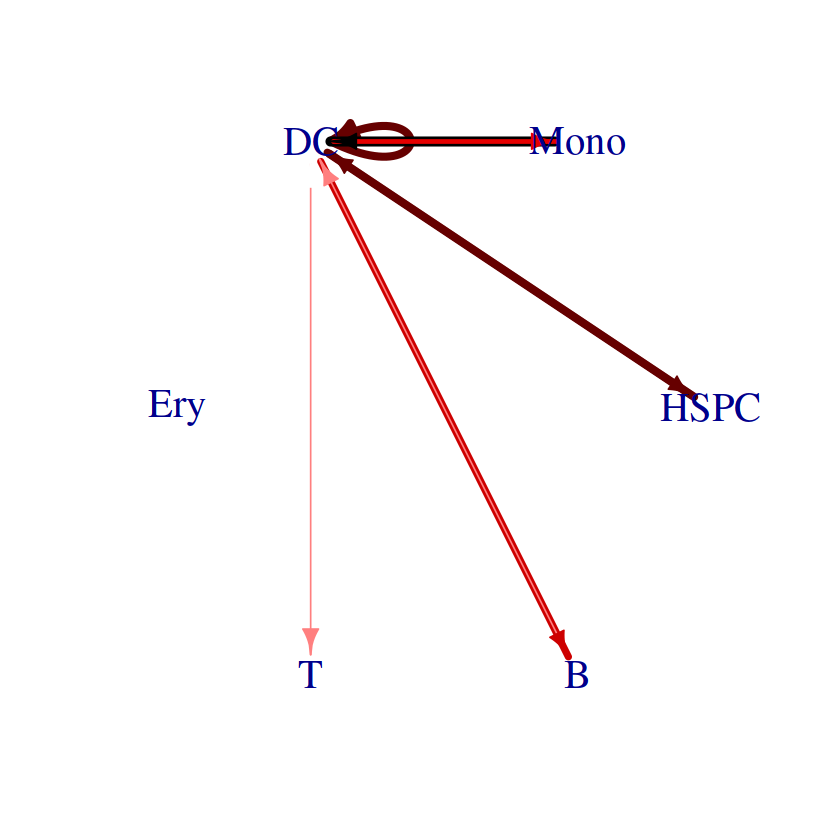

[1] "Ery"
[1] "up"
[1] 16


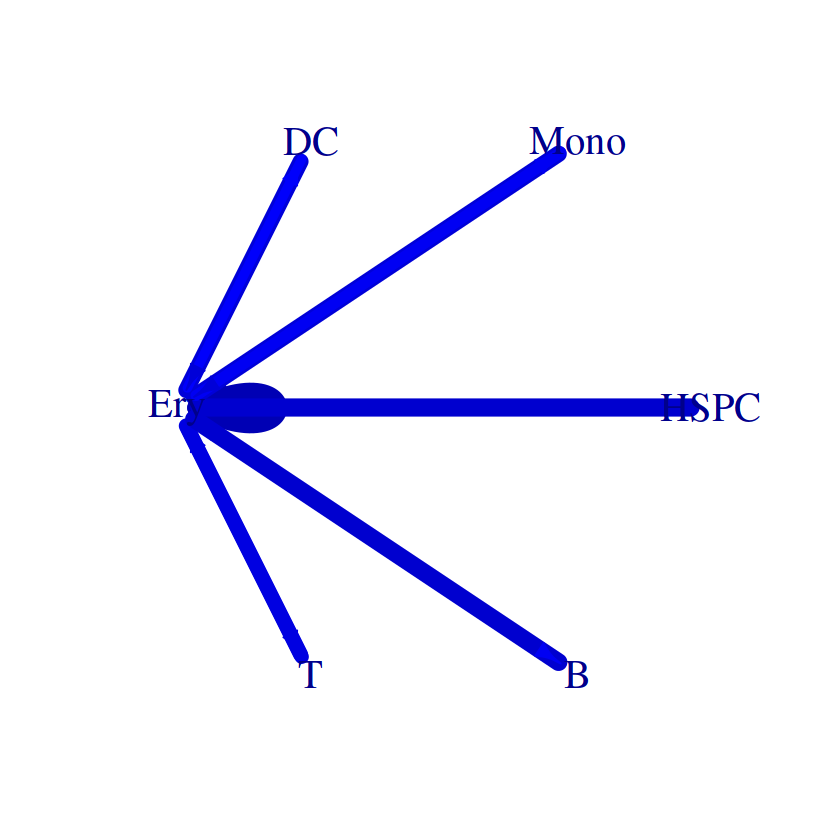

[1] "T"
[1] "down"
[1] 1312


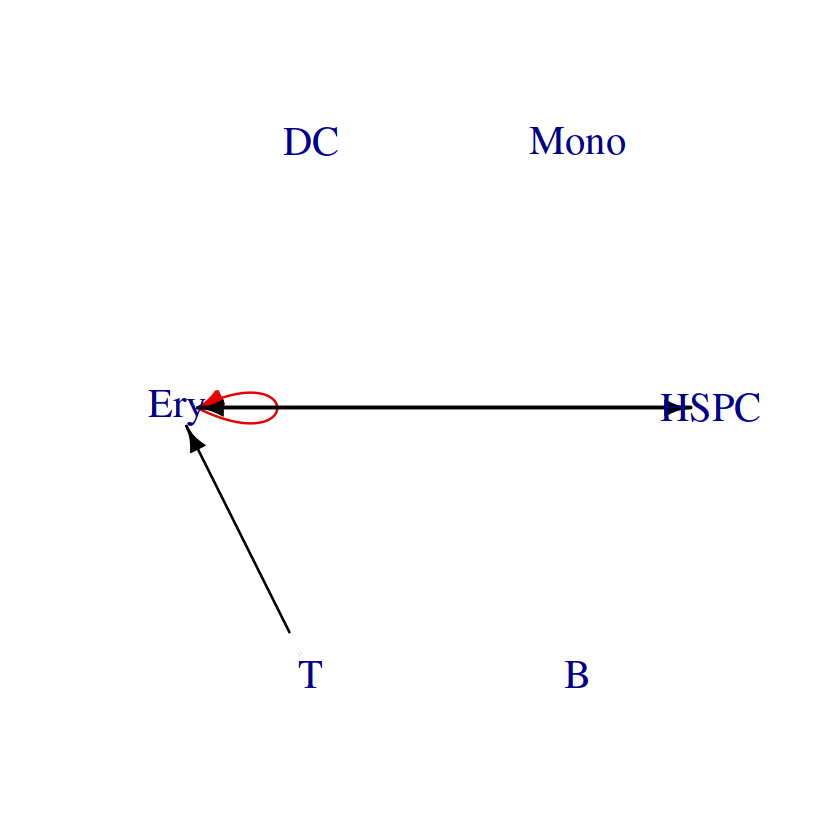

[1] "T"
[1] "up"
[1] 6


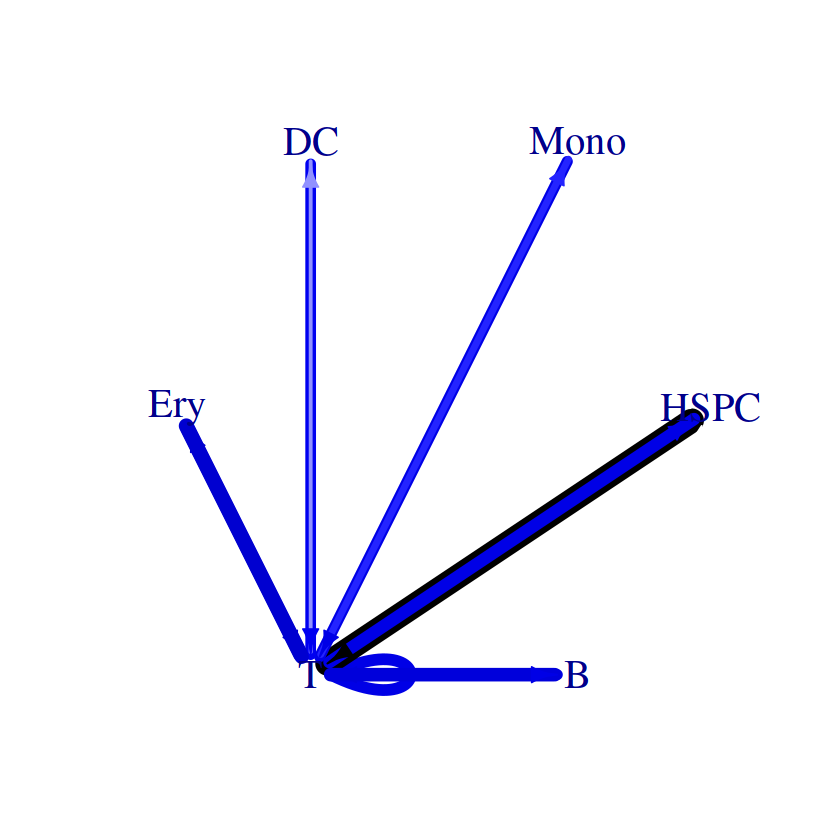

[1] "B"
[1] "down"
[1] 1434


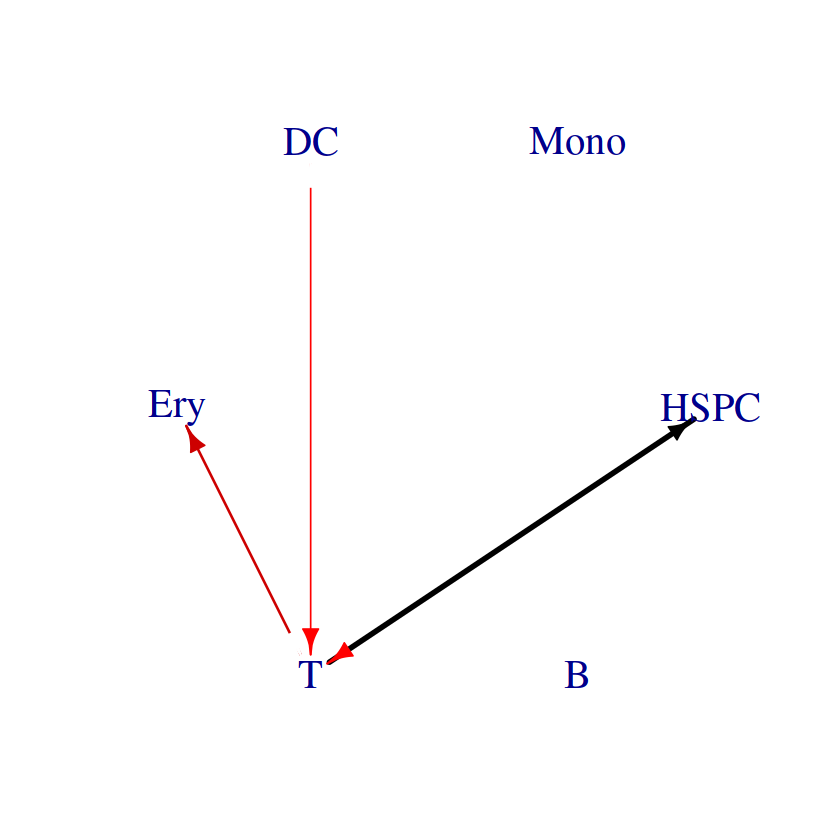

[1] "B"
[1] "up"
[1] 84


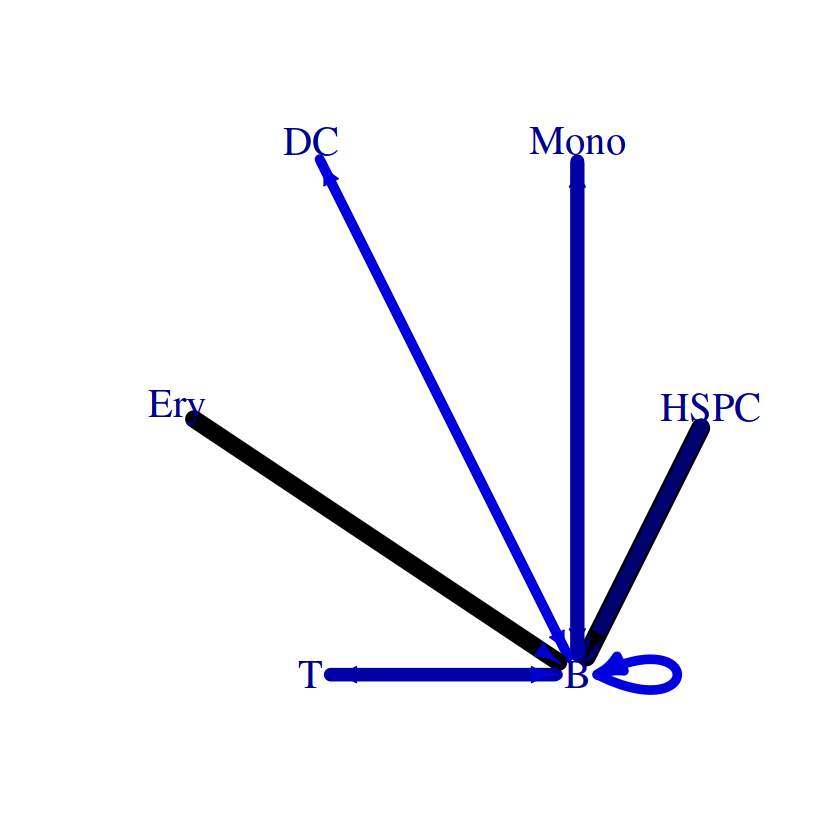

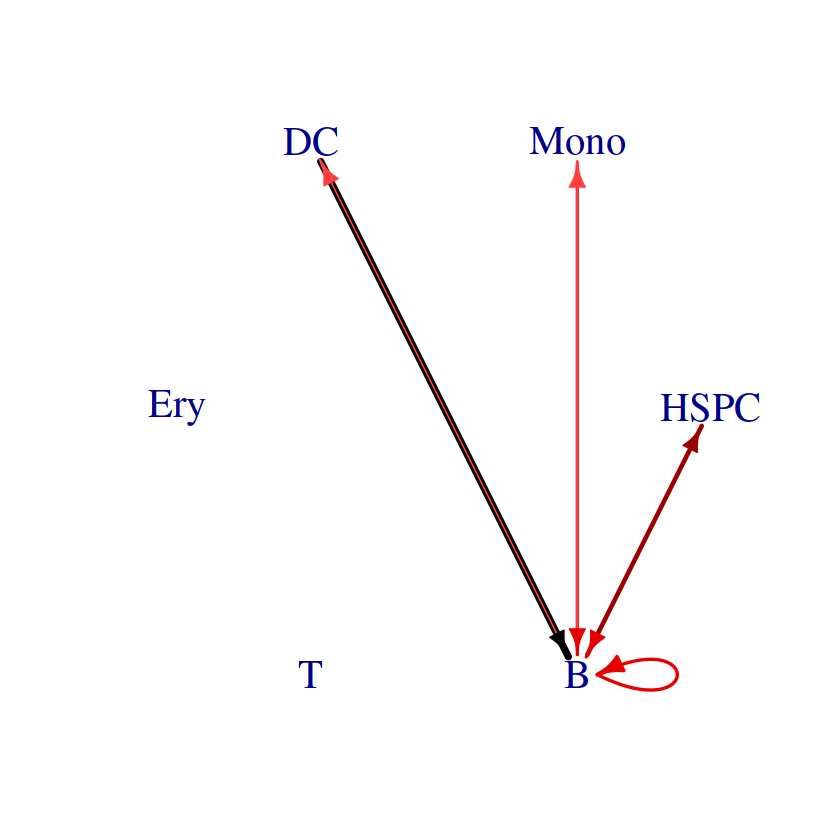

In [54]:
dir.create("figures")

for(cell_type in unique(interactions$anno_cells$cell_type)
   ){
    for(dir in c("down"
                ,"up")
       ){
        # idx of the interactions
        idx_cell_type <- (interactions$anno_interactions$sending_cell_type == cell_type) | (interactions$anno_interactions$receiving_cell_type == cell_type)
        
        ifelse(dir == "up"
              ,idx <- idx_cell_type & idx_good & idx_sign & idx_up
              ,idx <- idx_cell_type & idx_good & idx_sign & idx_down
              )
        
        print(cell_type)
        print(dir)
        print(sum(idx))
        
        # export
#         pdf(paste0("./figures"
#                   ,"/"
#                    ,cell_type
#                    ,"_"
#                    ,dir
#                    ,"_meanLog2FC_graph.pdf"
#                   )
#             ,width = 8
#             ,height = 8
#            )
        plot_mean_log2FCw_graph(interactions,idx,dir)
#         dev.off()
        
#         ifelse(sum(idx)< 10
#                ,my_height <- 2
#                ,ifelse(sum(idx)< 500
#                  ,my_height <- 5
#                  ,ifelse(sum(idx)< 1000
#                         ,my_height <- 10
#                         ,ifelse(sum(idx)< 2000
#                                 ,my_height <- 15
#                                ,my_height <- 20))
#                  )
#               )
        
        
#         pdf(paste0("./figures"
#                   ,"/"
#                    ,cell_type
#                    ,"_"
#                    ,dir
#                    ,"_forest.pdf"
#                   )
#             ,width = 10
#             ,height = my_height
#            )
        # plot forest
#         plot_all_forests(idx,my_anno_interactions = interactions$anno_interactions)
        
#         dev.off()
    }
}

# Export

In [ ]:
print("save interactions.RData")
save(interactions, file = "interactions.RData")

In [ ]:
mean_log2FCw_graph2(interactions,idx,dir)

In [ ]:
mean_log2FCw_graph2 <- function(my_interactions
                               ,my_idx
                               ,direction){
        
        cell_types <- unique(my_interactions$anno_cells$cell_type)
        health_status <- unique(my_interactions$anno_samples$health_status)
        
        dummy_min <- 0.00000001
        
        # mean weight of interactions. Sign 
        # prepare adjusency matrix
        mean_mat <- matrix(NA
                           ,nrow = length(cell_types)
                           ,ncol = length(cell_types))
        rownames(mean_mat) <- cell_types
        colnames(mean_mat) <- cell_types
        
        # calculate mean weight per pair of sending and receiving cell types and per condition
        for(i in cell_types){
                for(j in cell_types){
                        idx_send <- my_interactions$anno_interactions$sending_cell_type == i
                        idx_rec <- my_interactions$anno_interactions$receiving_cell_type == j
                        
                        idx_interactions <- my_idx & idx_send & idx_rec
                        
                        #print(i)
                        #print(j)
                        #print(sum(idx_interactions))
                        
                        ifelse(sum(idx_interactions) != 0
                               ,{means <- mean(my_interactions$anno_interactions$log2FC_weights[idx_interactions]
                               )
                               mean_mat[i,j]  <- mean(means[means != 0])
                               }
                               ,mean_mat[i,j]  <- 0
                        )
                        
                        
                        
                }
        }
        
        #print(mean_w_mat)
        
        interactions.width <- unlist(lapply(1:nrow(mean_mat),function(i) mean_mat[i,]))
        #print("head(interactions.width)")
        #print(head(interactions.width))
        
        
        max_value <- max(ceiling(abs(interactions.width)))
        
        #print(max_value)
        ifelse(direction == "down"
               ,color_palette  <-  c("white","blue","blue3","black")
               ,color_palette  <-  c("white","red","red3","black")
        )
        
        col <- colorRampPalette(color_palette)(max_value)
        
        # construct graph
        g <- graph(c(t(my_interactions$anno_interactions[#my_idx
                ,c("sending_cell_type","receiving_cell_type")]
        )))
        #g
        
        #print(g[])
        
        g_simp <- simplify(g, remove.loops = F)
        #print(g_simp)
        
        options(repr.plot.width = 7
                ,repr.plot.height = 7)
        
        
        my_interactions.width <- abs(interactions.width) + dummy_min
        #print("my_interactions.width")
        #print(my_interactions.width)
        
        p <- plot(g_simp
                  #,main = hs
                  ,layout = layout_in_circle(g_simp)
                  ,interactions.curved=0.05
                  ,vertex.shape="none"
                  ,vertex.label.cex = 2
                  ,interactions.color = col[round(my_interactions.width,digits = 0)+1]
                  ,interactions.width = my_interactions.width 
        )
        
#         p
        
        
        
        
        
        
        return(p)
}